# Problem statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

since we have to predict number of  wins which is contineous type of data the problem can be solved by using regression analysis

# Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing csv file

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Analyzing raw data

In [5]:
#checking shape
df.shape

(30, 17)

In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
#checking null value

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

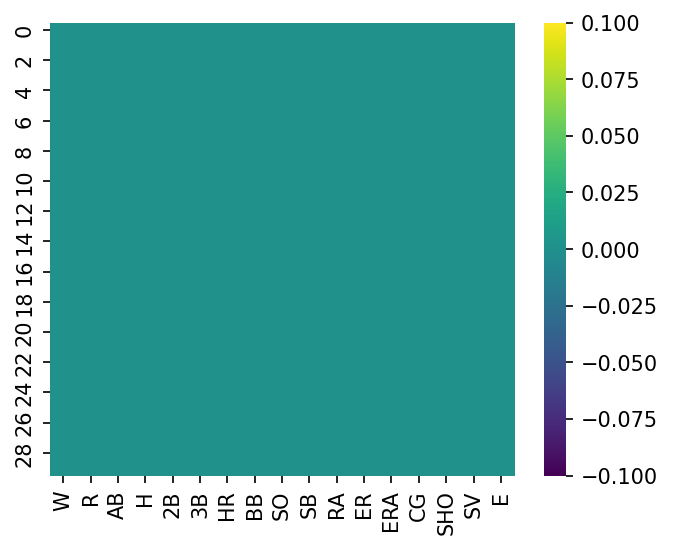

In [15]:
plt.figure(figsize=(5,4),dpi=150)
sns.heatmap(df.isnull(),cmap='viridis');

In [16]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# OBSERVATION FROM ABOVE ALL CHARTS AND GRAPHS
-  from the above graph we conclude that..
    1. there are total 30 rows and 17 columns present in a data set
    2. no missing value and null values are present in the dataset.
    3. all columns are in numerical form containing only one float columns else all others are integer.
    4. heat map confirms the validity of all observation.

In [17]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Distribution of the data looks balanced from above table as there is no sudden jump in any value from 25 percentile to 50 percentileor from 50 per to 100 per except in SHO columns .Also counts are 30 in each columns so no missing data.

# EXPLORATORY DATA ANALYSIS

# BIVARIATE ANALYSIS OF DATASET

# 1 Between W AND R

<AxesSubplot:xlabel='W', ylabel='R'>

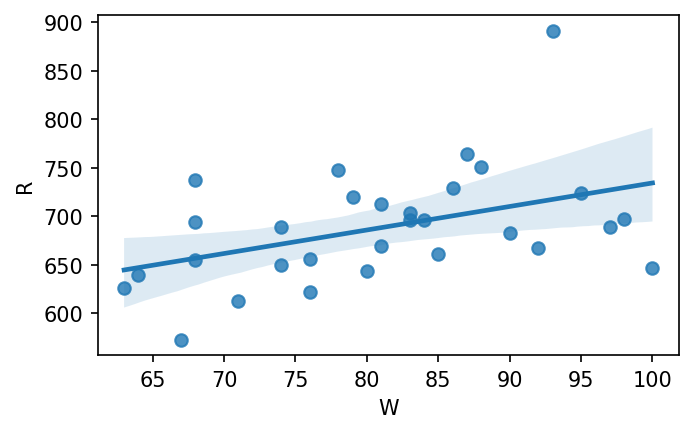

In [18]:

plt.figure(figsize=(5,3),dpi=150)
sns.regplot(data=df,x='W',y='R')

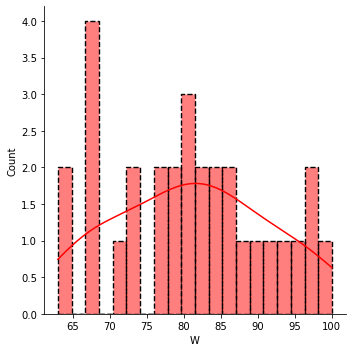

In [19]:
sns.displot(data=df,x='W',bins=20,kde=True,
            color='red',edgecolor='black',lw=4,ls='--')

<AxesSubplot:xlabel='W', ylabel='Density'>

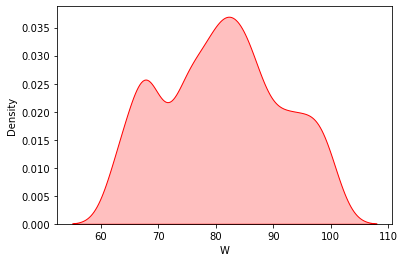

In [20]:
sns.kdeplot(data=df,x='W',bw_adjust=0.5,shade=True,color='red')

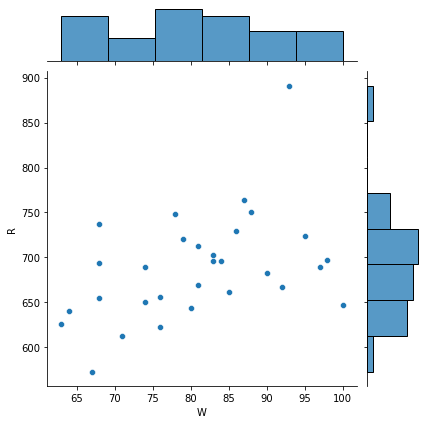

In [21]:
sns.jointplot(x='W',y='R',data=df)

# As we observe that win and run is strongly related among themselves.dots are distributed nearby the line and increasing in proportion to run.

# 2. Between w and AB

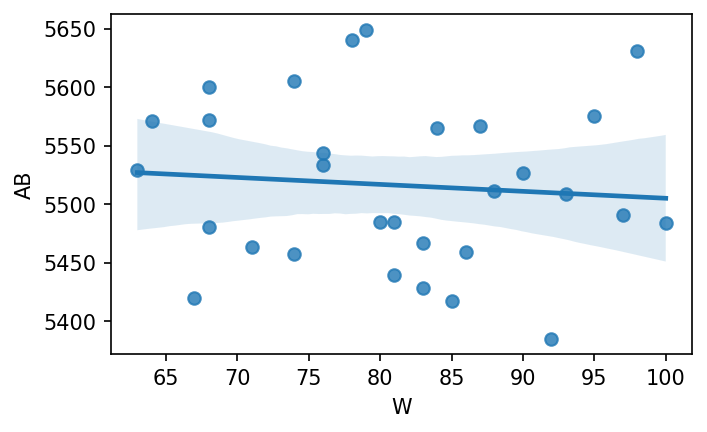

In [22]:
plt.figure(figsize=(5,3),dpi=150)
sns.regplot(data=df,x='W',y='AB');

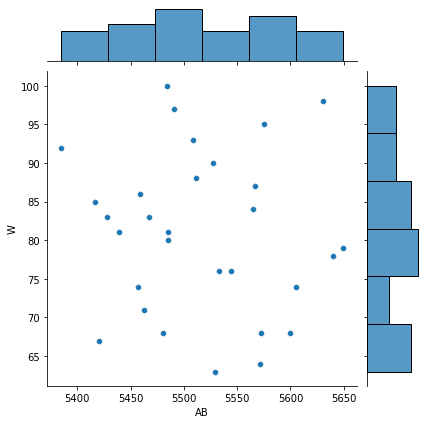

In [23]:
sns.jointplot(x='AB',y='W',data=df)

# As we observe that win and At ball is poor relationship among themselves.dots are randomly distributed from the line .

# 3. Between w and H

<AxesSubplot:xlabel='W', ylabel='H'>

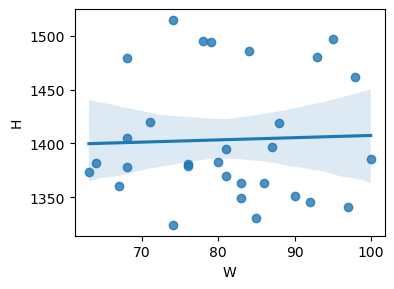

In [24]:
plt.figure(figsize=(4,3),dpi=100)
sns.regplot(data=df,x='W',y='H')

<AxesSubplot:xlabel='H', ylabel='Density'>

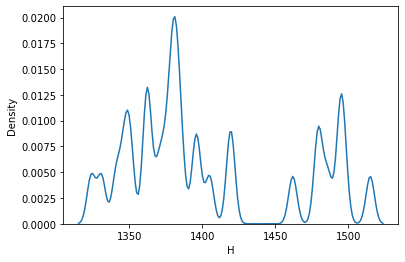

In [25]:
sns.kdeplot(data=df,x='H',bw_adjust=0.1)

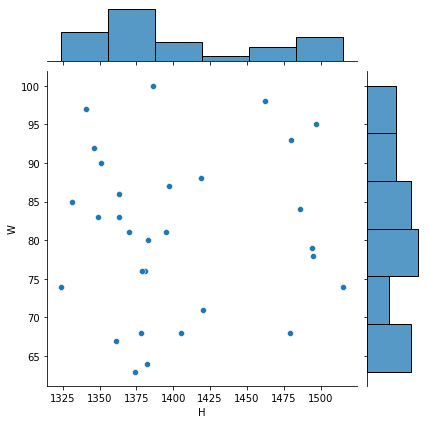

In [26]:
sns.jointplot(x='H',y='W',data=df);

# Hit is also very randomly distributed with the line and has weak relationship with win.

# 4. Between w and 2B

<Figure size 720x432 with 0 Axes>

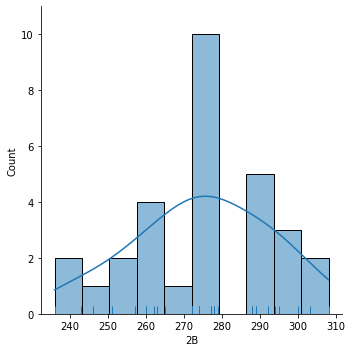

In [27]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x='2B',bins=10,rug=True,kde=True)

<AxesSubplot:xlabel='2B', ylabel='W'>

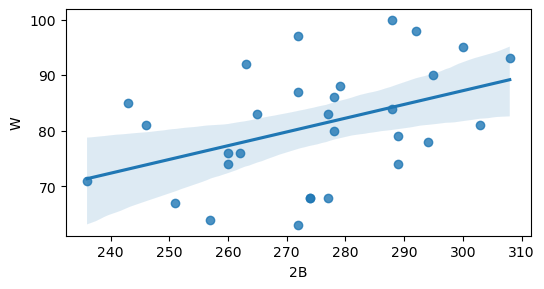

In [28]:
plt.figure(figsize=(6,3),dpi=100)
sns.regplot(data=df,x='2B',y='W')

# 5. Between w and 3B

<Figure size 720x432 with 0 Axes>

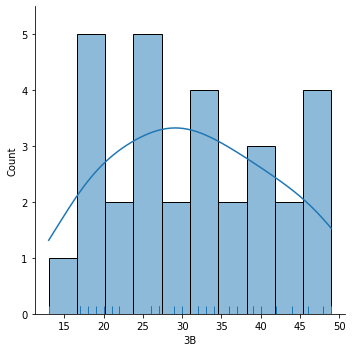

In [29]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x='3B',bins=10,rug=True,kde=True);

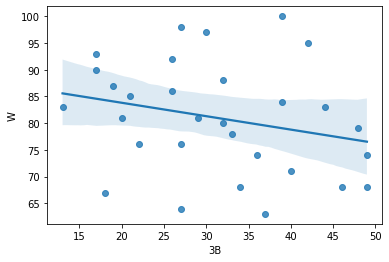

In [30]:
sns.regplot(data=df,x='3B',y='W');

# most of the data are widely distributed

# 6. Between w and HR

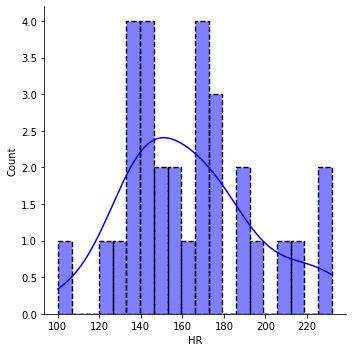

In [31]:
sns.displot(data=df,x='HR',bins=20,kde=True,
            color='blue',edgecolor='black',lw=4,ls='--')

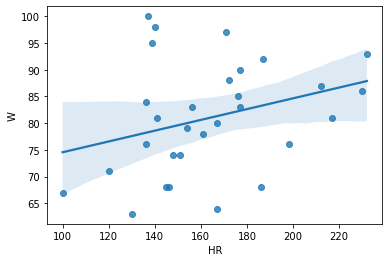

In [32]:
sns.regplot(data=df,x='HR',y='W');

# Win and home runs has more and less good relation with each other.line is little bit right skewed

# 7. Between w and BB

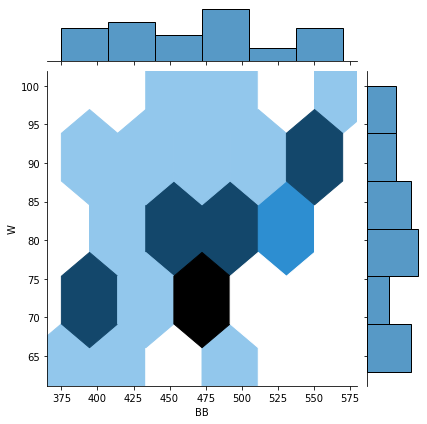

In [33]:
sns.jointplot(x='BB',y='W',data=df,kind='hex')

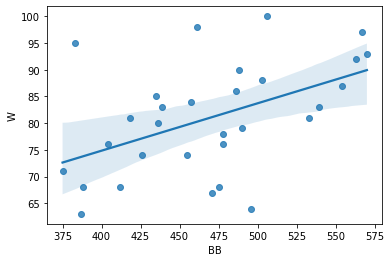

In [34]:
sns.regplot(data=df,x='BB',y='W');

# Walk has a good relationship with win .

# 8. Between w and SO

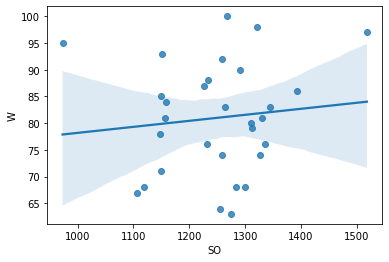

In [35]:
sns.regplot(data=df,x='SO',y='W');

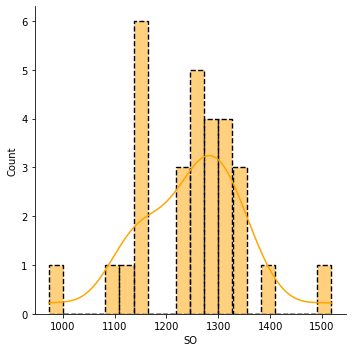

In [36]:
sns.displot(data=df,x='SO',bins=20,kde=True,
            color='orange',edgecolor='black',lw=4,ls='--');

# Strikeout is not correlated to win  and the dataset is left-skewed.

# 9. Between w and SB

<Figure size 2400x1600 with 0 Axes>

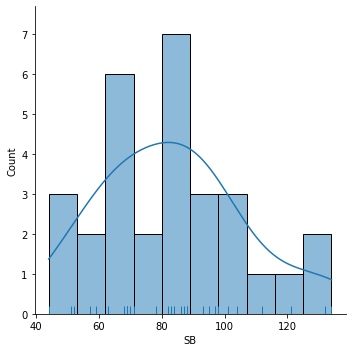

In [37]:
plt.figure(figsize=(12,8),dpi=200)
sns.displot(data=df,x='SB',bins=10,rug=True,kde=True);

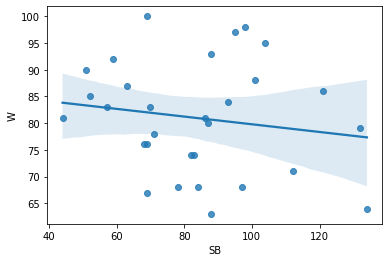

In [38]:
sns.regplot(data=df,x='SB',y='W');

# Stolen Bases is not correlated to win

# 10. Between w and RA

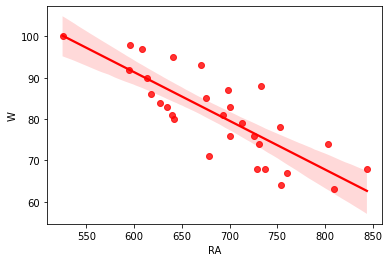

In [39]:
sns.regplot(data=df,x='RA',y='W',color='red');

<Figure size 2400x1600 with 0 Axes>

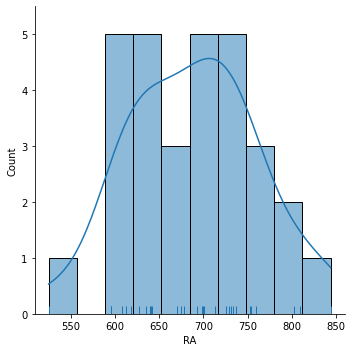

In [40]:
plt.figure(figsize=(12,8),dpi=200)
sns.displot(data=df,x='RA',bins=10,rug=True,kde=True);

# Runs Allowed is highly correlated to win

# 11. Between w and ER

<Figure size 2400x1600 with 0 Axes>

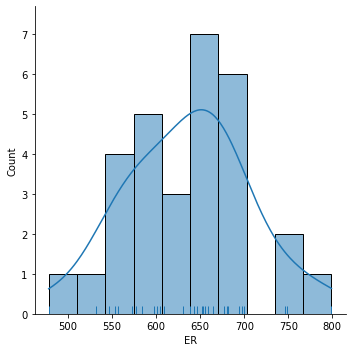

In [41]:
plt.figure(figsize=(12,8),dpi=200)
sns.displot(data=df,x='ER',bins=10,rug=True,kde=True);

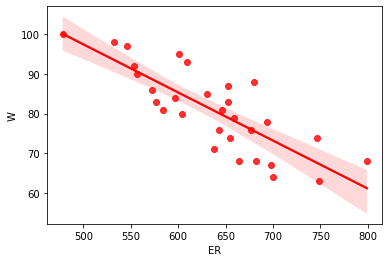

In [42]:
sns.regplot(data=df,x='ER',y='W',color='red');

# Very strong relation between w and earned runs

# 12. Between w and ERA

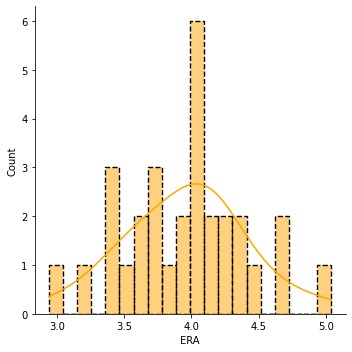

In [43]:
sns.displot(data=df,x='ERA',bins=20,kde=True,
            color='orange',edgecolor='black',lw=4,ls='--');

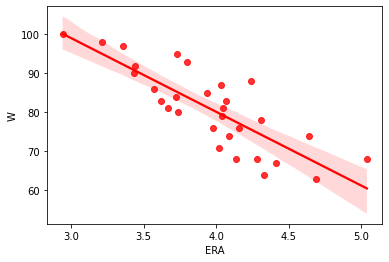

In [44]:
sns.regplot(data=df,x='ERA',y='W',color='red');

# earned run average is highly correlated with win

# 13. BETWEEN W AND CG

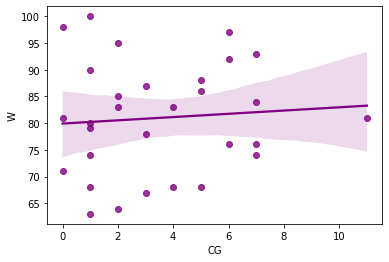

In [45]:
sns.regplot(data=df,x='CG',y='W',color='purple');

# points are widely distributed as no good relationship exists among themselved

# 14. Between w and SHO

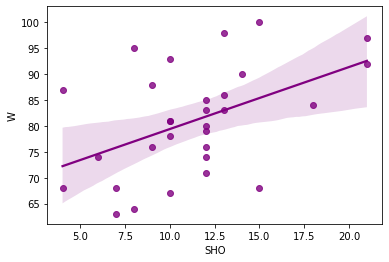

In [46]:
sns.regplot(data=df,x='SHO',y='W',color='purple');

<AxesSubplot:xlabel='SHO', ylabel='Density'>

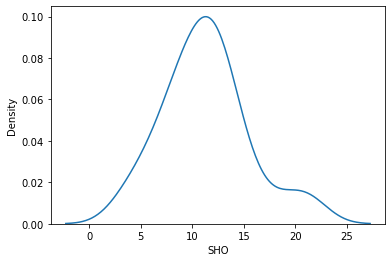

In [47]:
sns.kdeplot(data=df,x='SHO')

# not a perfect correlation

# 15. Between w and SV

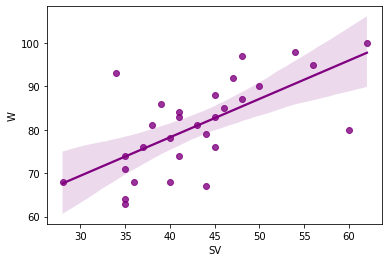

In [48]:
sns.regplot(data=df,x='SV',y='W',color='purple');

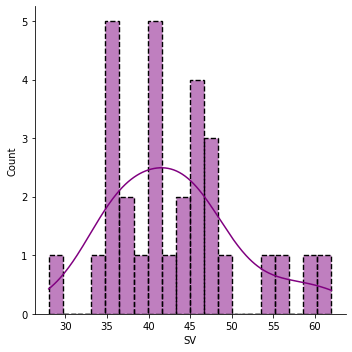

In [49]:
sns.displot(data=df,x='SV',bins=20,kde=True,
            color='purple',edgecolor='black',lw=4,ls='--');

# saves has strong correlation with win

# NOW LETS US COMPARE EACH OTHERS WITH MORE THAN TWO PARAMETERS

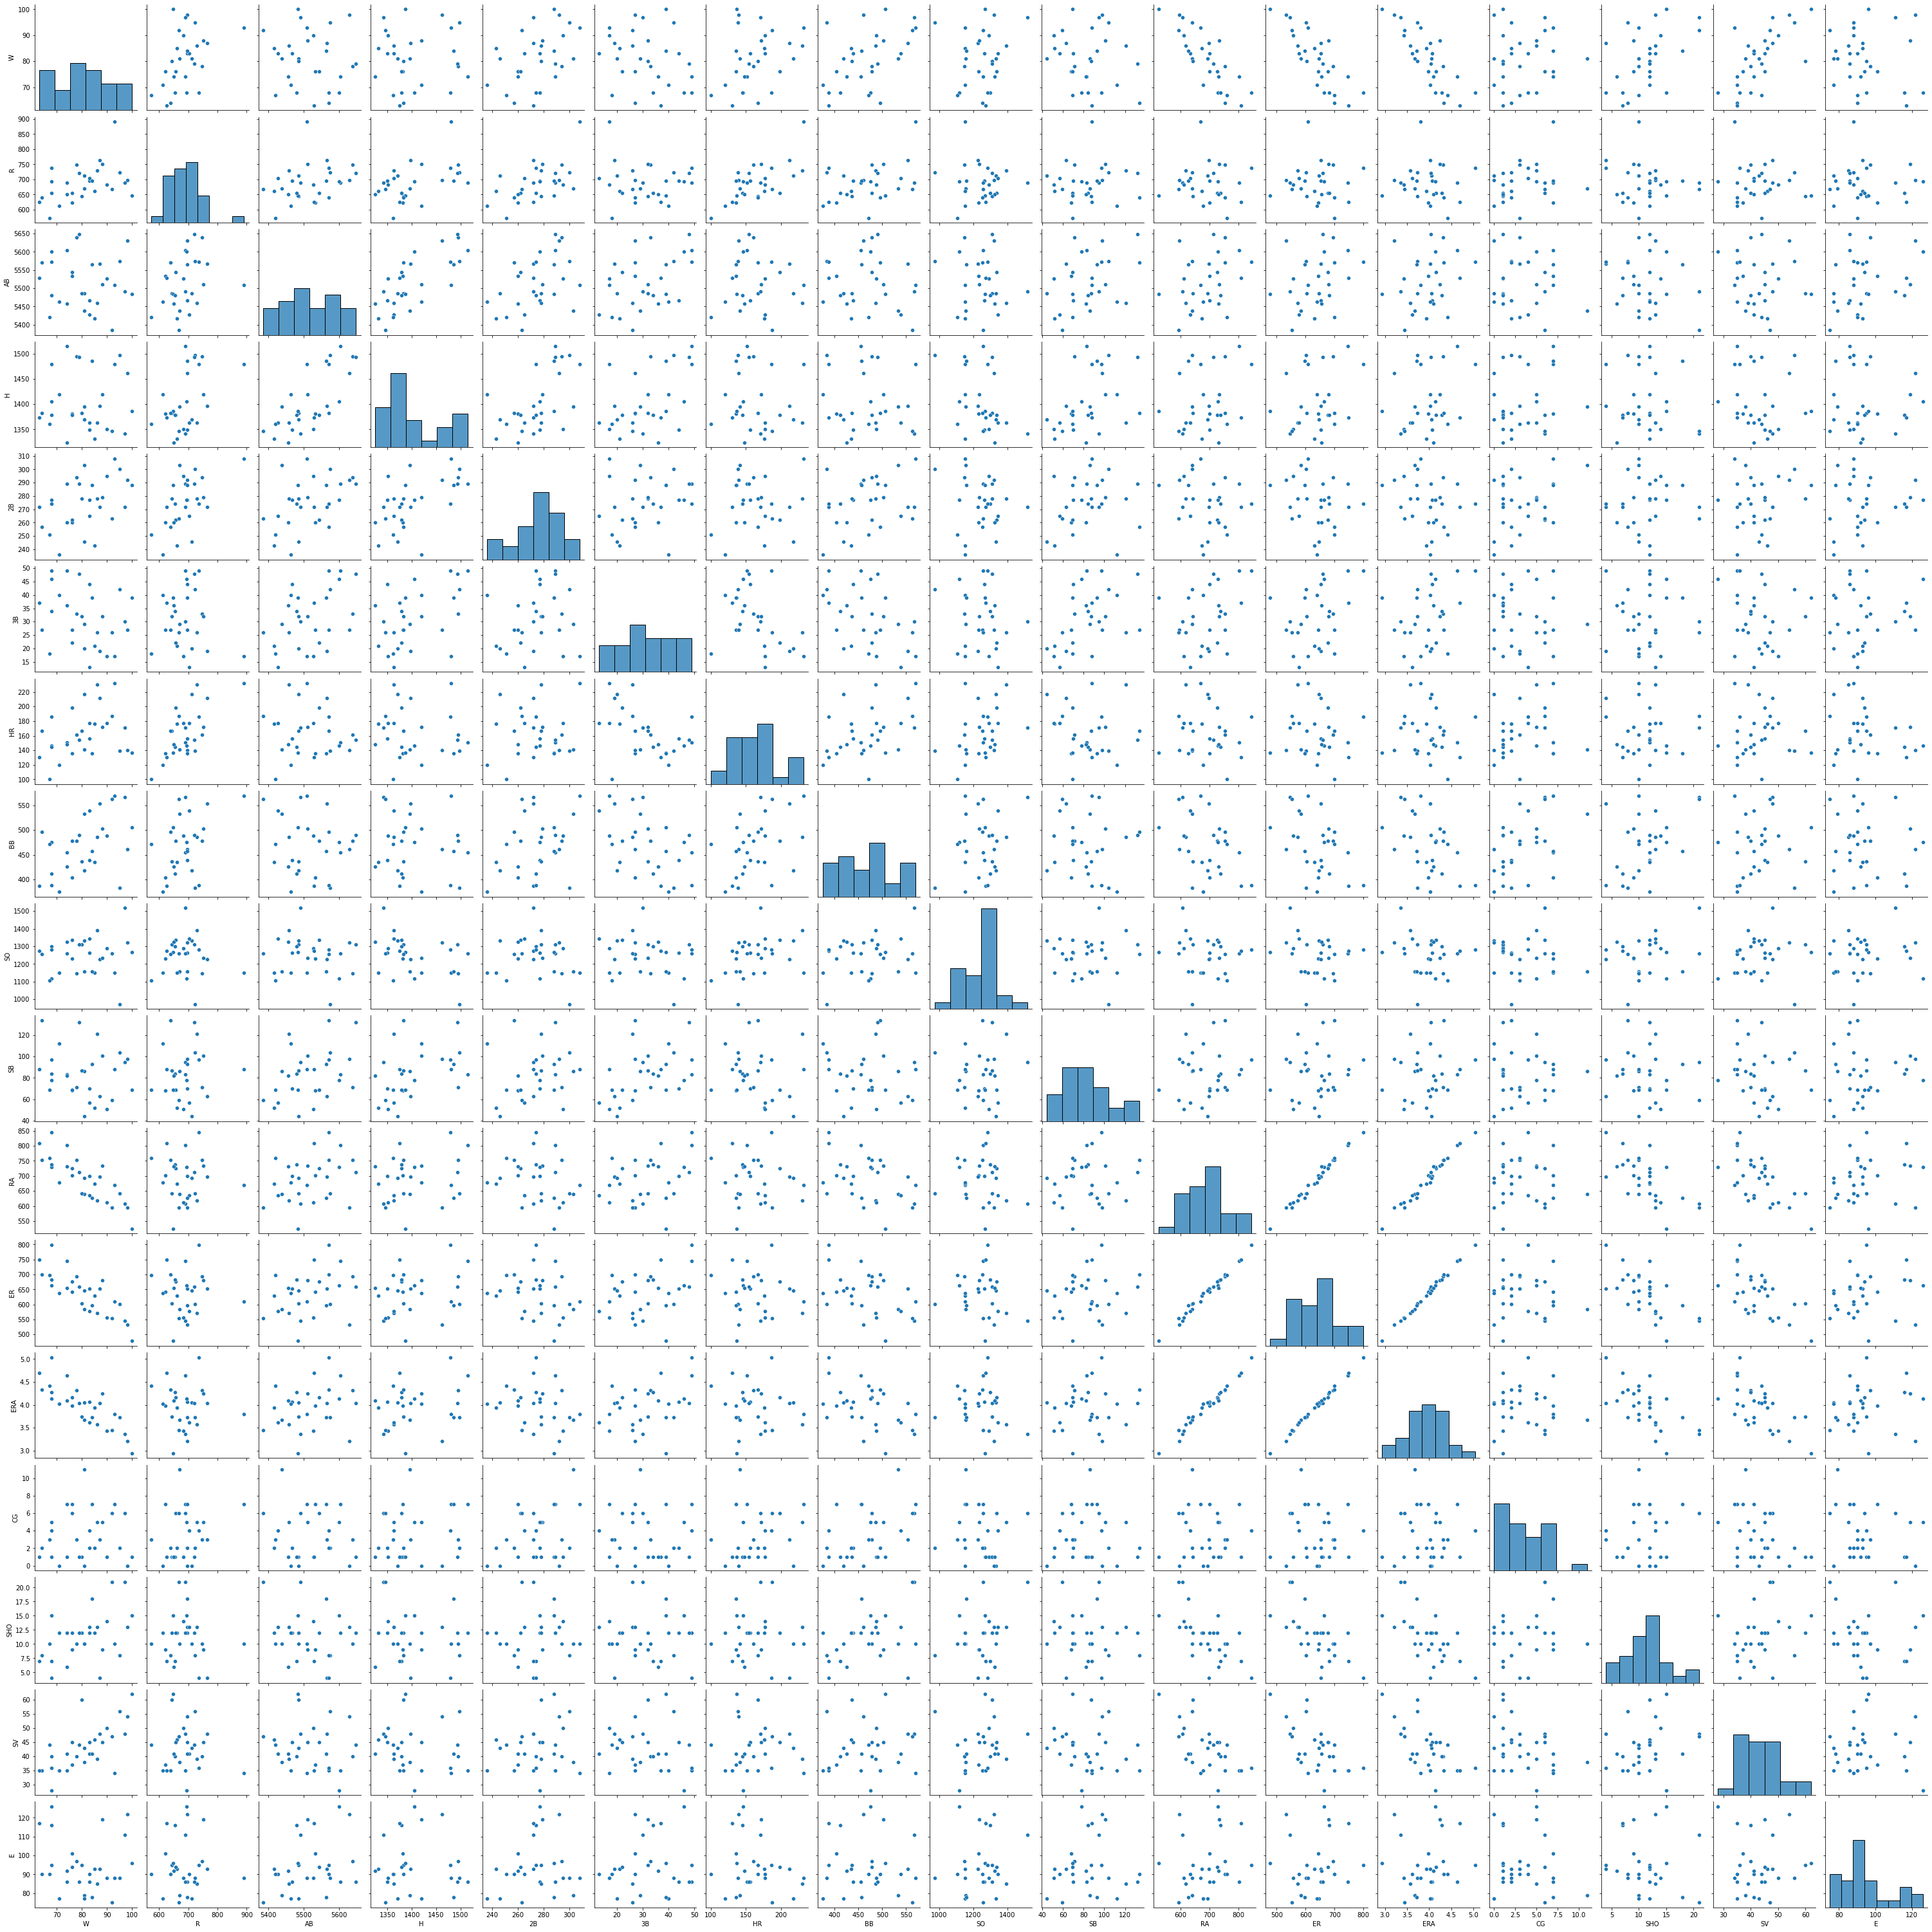

In [8]:
sns.pairplot(df)

# from the above graph the distribution of histplot give information about the distribution and skewness of curve but due to more number of features and messy look nothing much information can be gatherd 

<Figure size 1500x900 with 0 Axes>

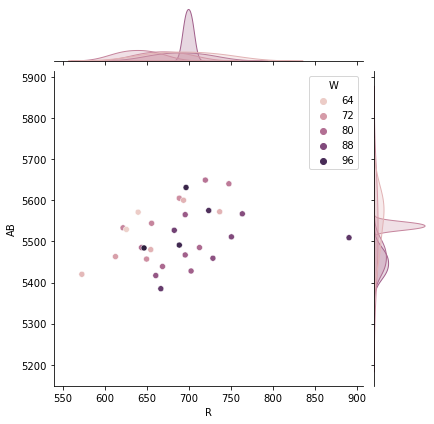

In [51]:
plt.figure(figsize=(10,6),dpi=150)
sns.jointplot(data=df,x='R',y='AB',hue='W')

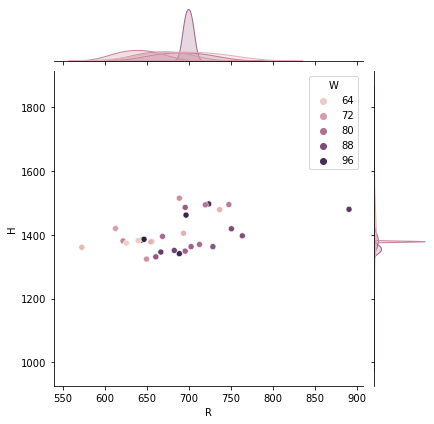

In [52]:
sns.jointplot(data=df,x='R',y='H',hue='W');

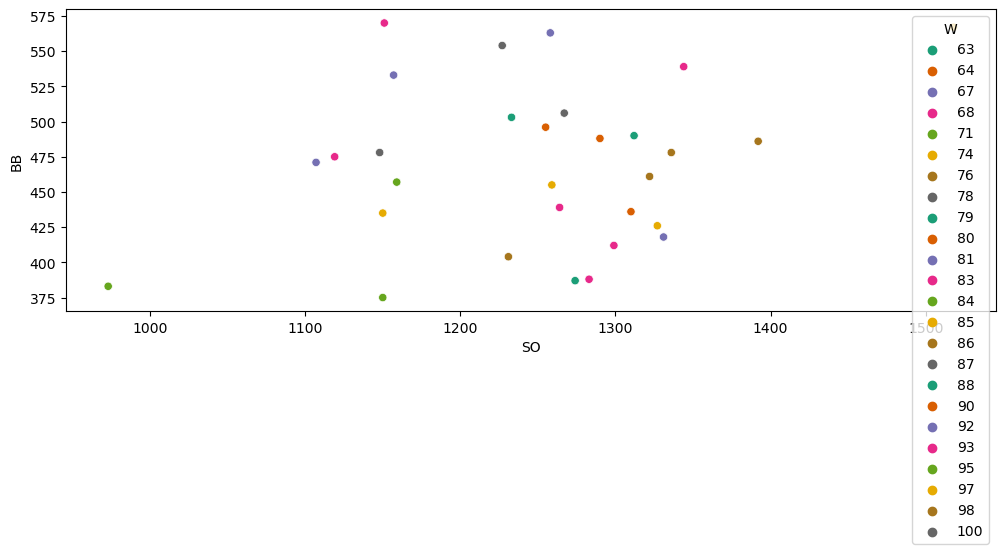

In [53]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(x='SO',y='BB',data=df,hue='W',
               palette='Dark2');

# This is showing that strikeout between the range 1200 to 1300 win density  is more.

# now let us correlates features with target

In [54]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

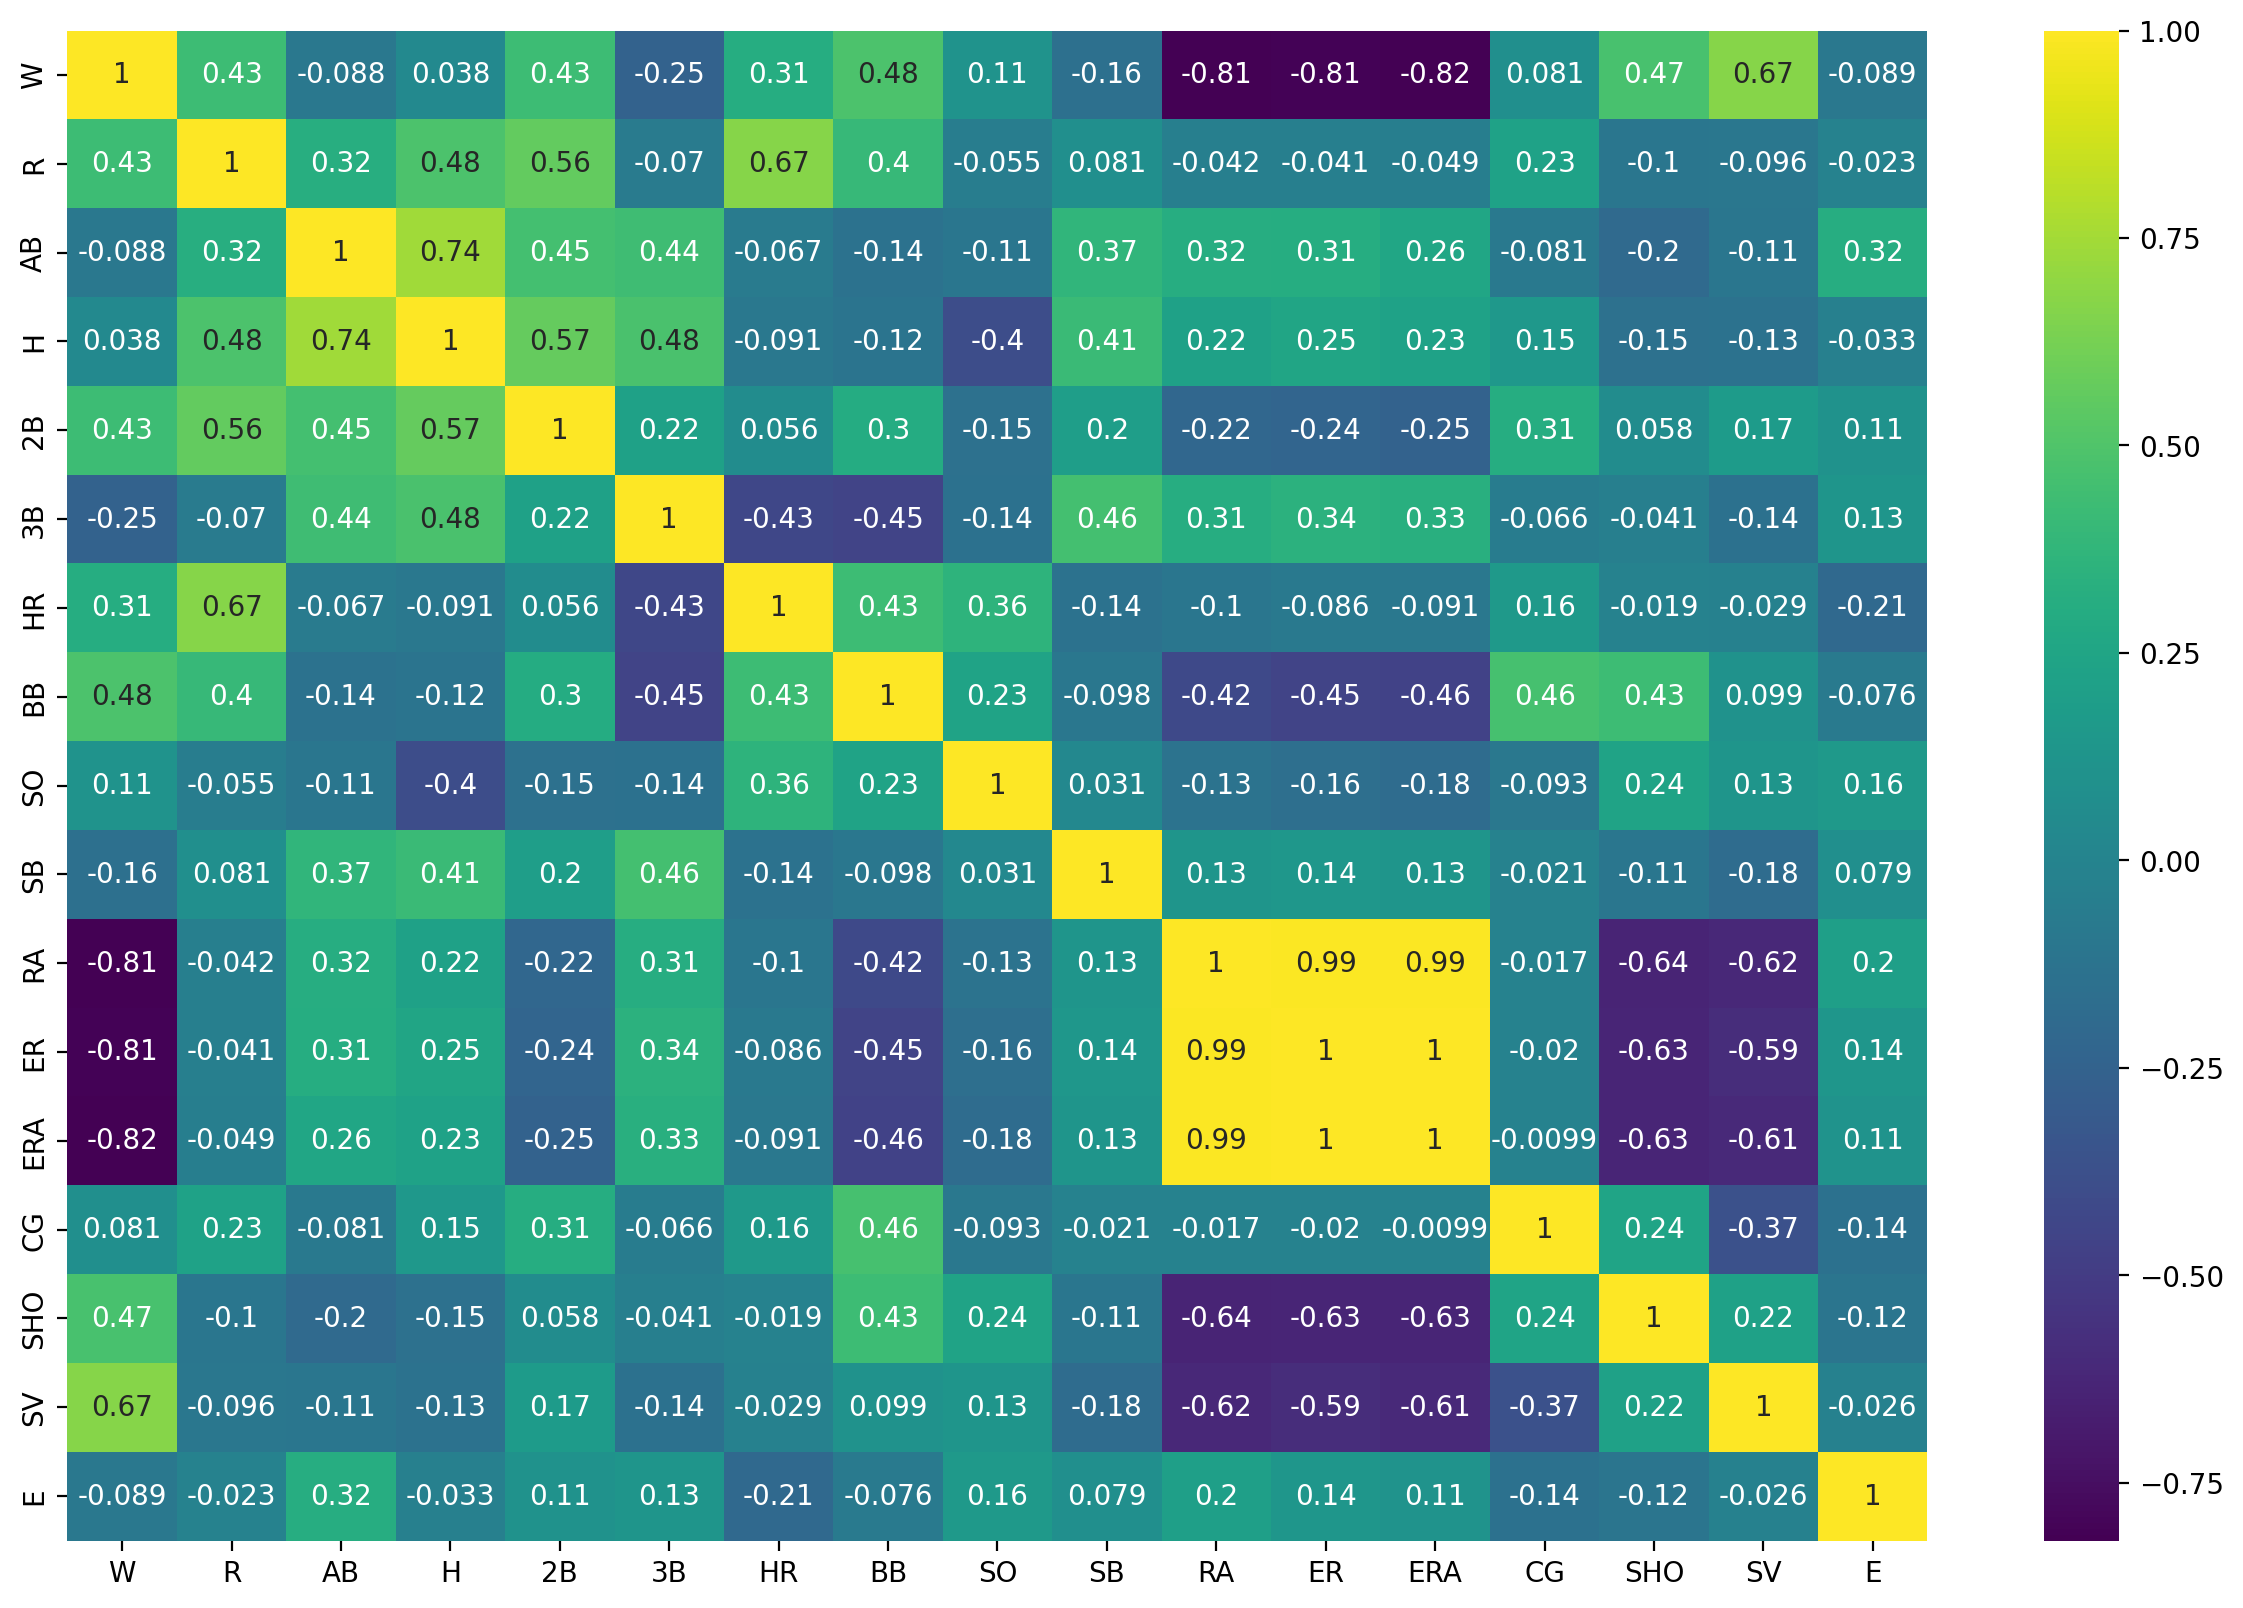

In [55]:
plt.figure(figsize=(15,10),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

# In the above heatmap we observe that 'ER'and 'ERA' shows strong correlation with RA .so we may eliminate one the features after further verification. 

# let us check outliers 

In [56]:
#target column is w so we will drop this
df_data=df.drop(columns ='W')

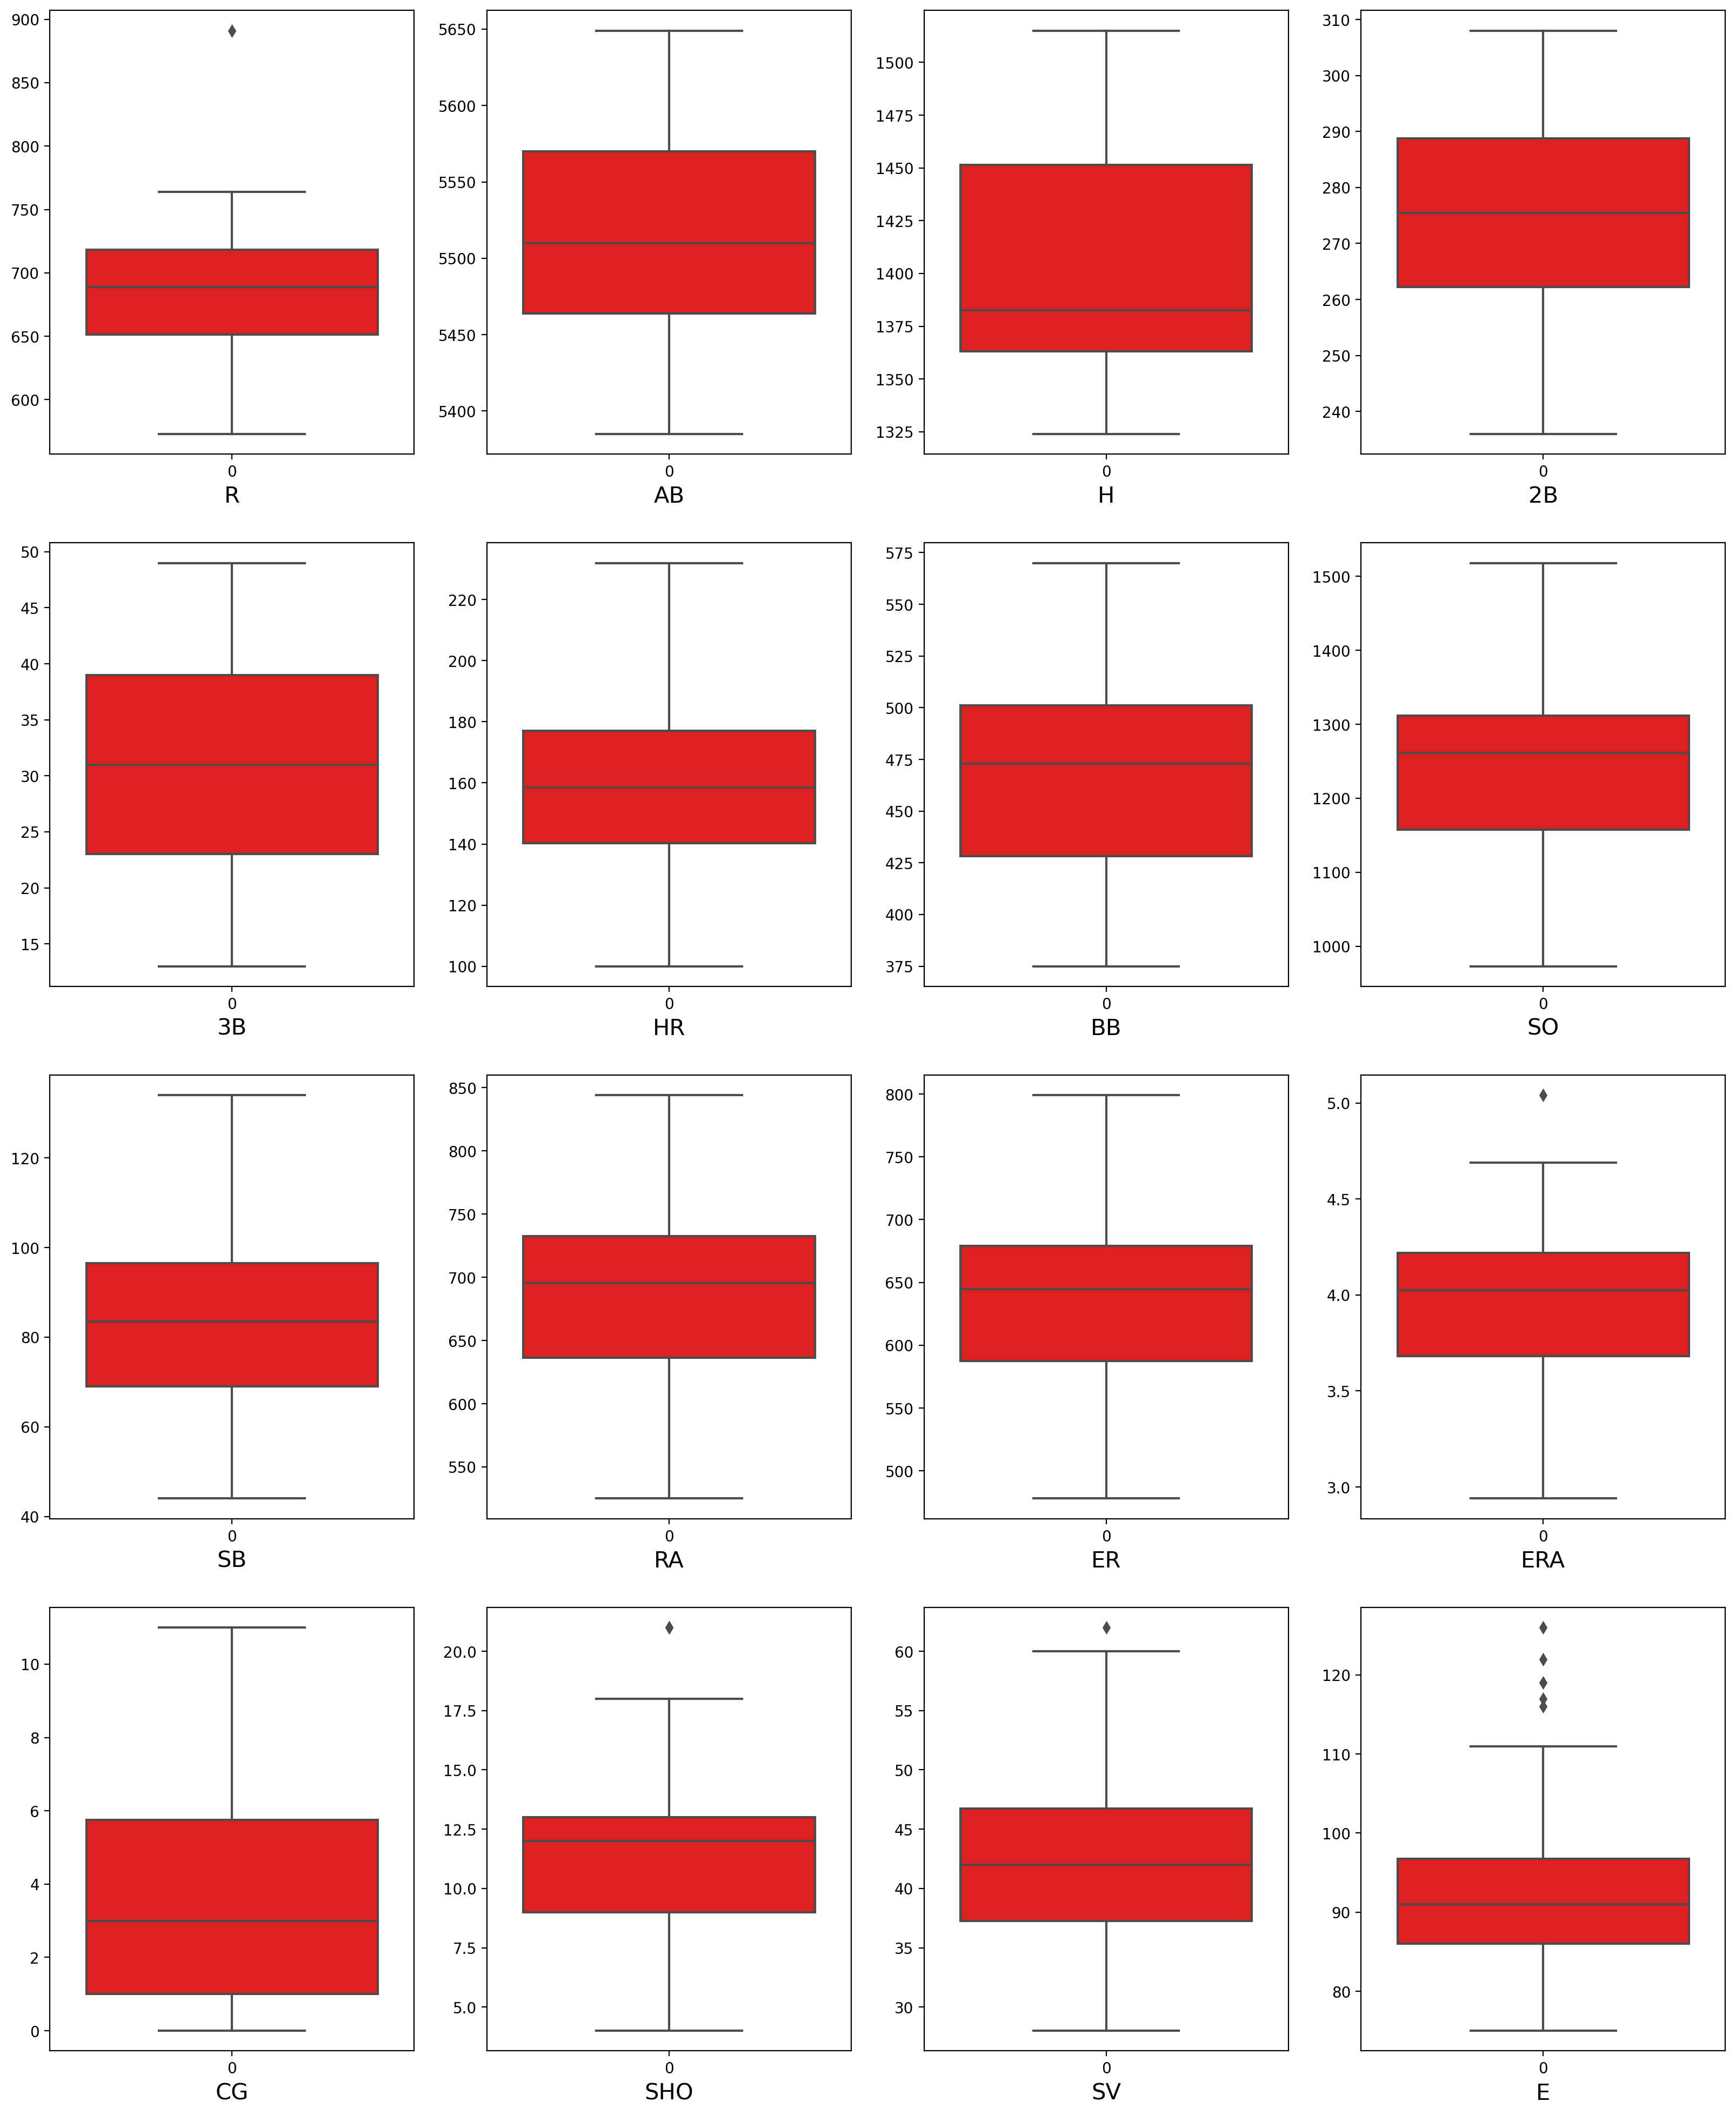

In [57]:
#Check for outliers using box plot


plt.figure(figsize=(20,25),dpi=200)
graph = 1
for column in df_data:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.boxplot(data=df_data[column],color='r')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# As we observe above that oulliers present in R, ERA, SHO , SV and E.so we will remove all the outliers after checking skweness.

In [58]:
df_data.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996


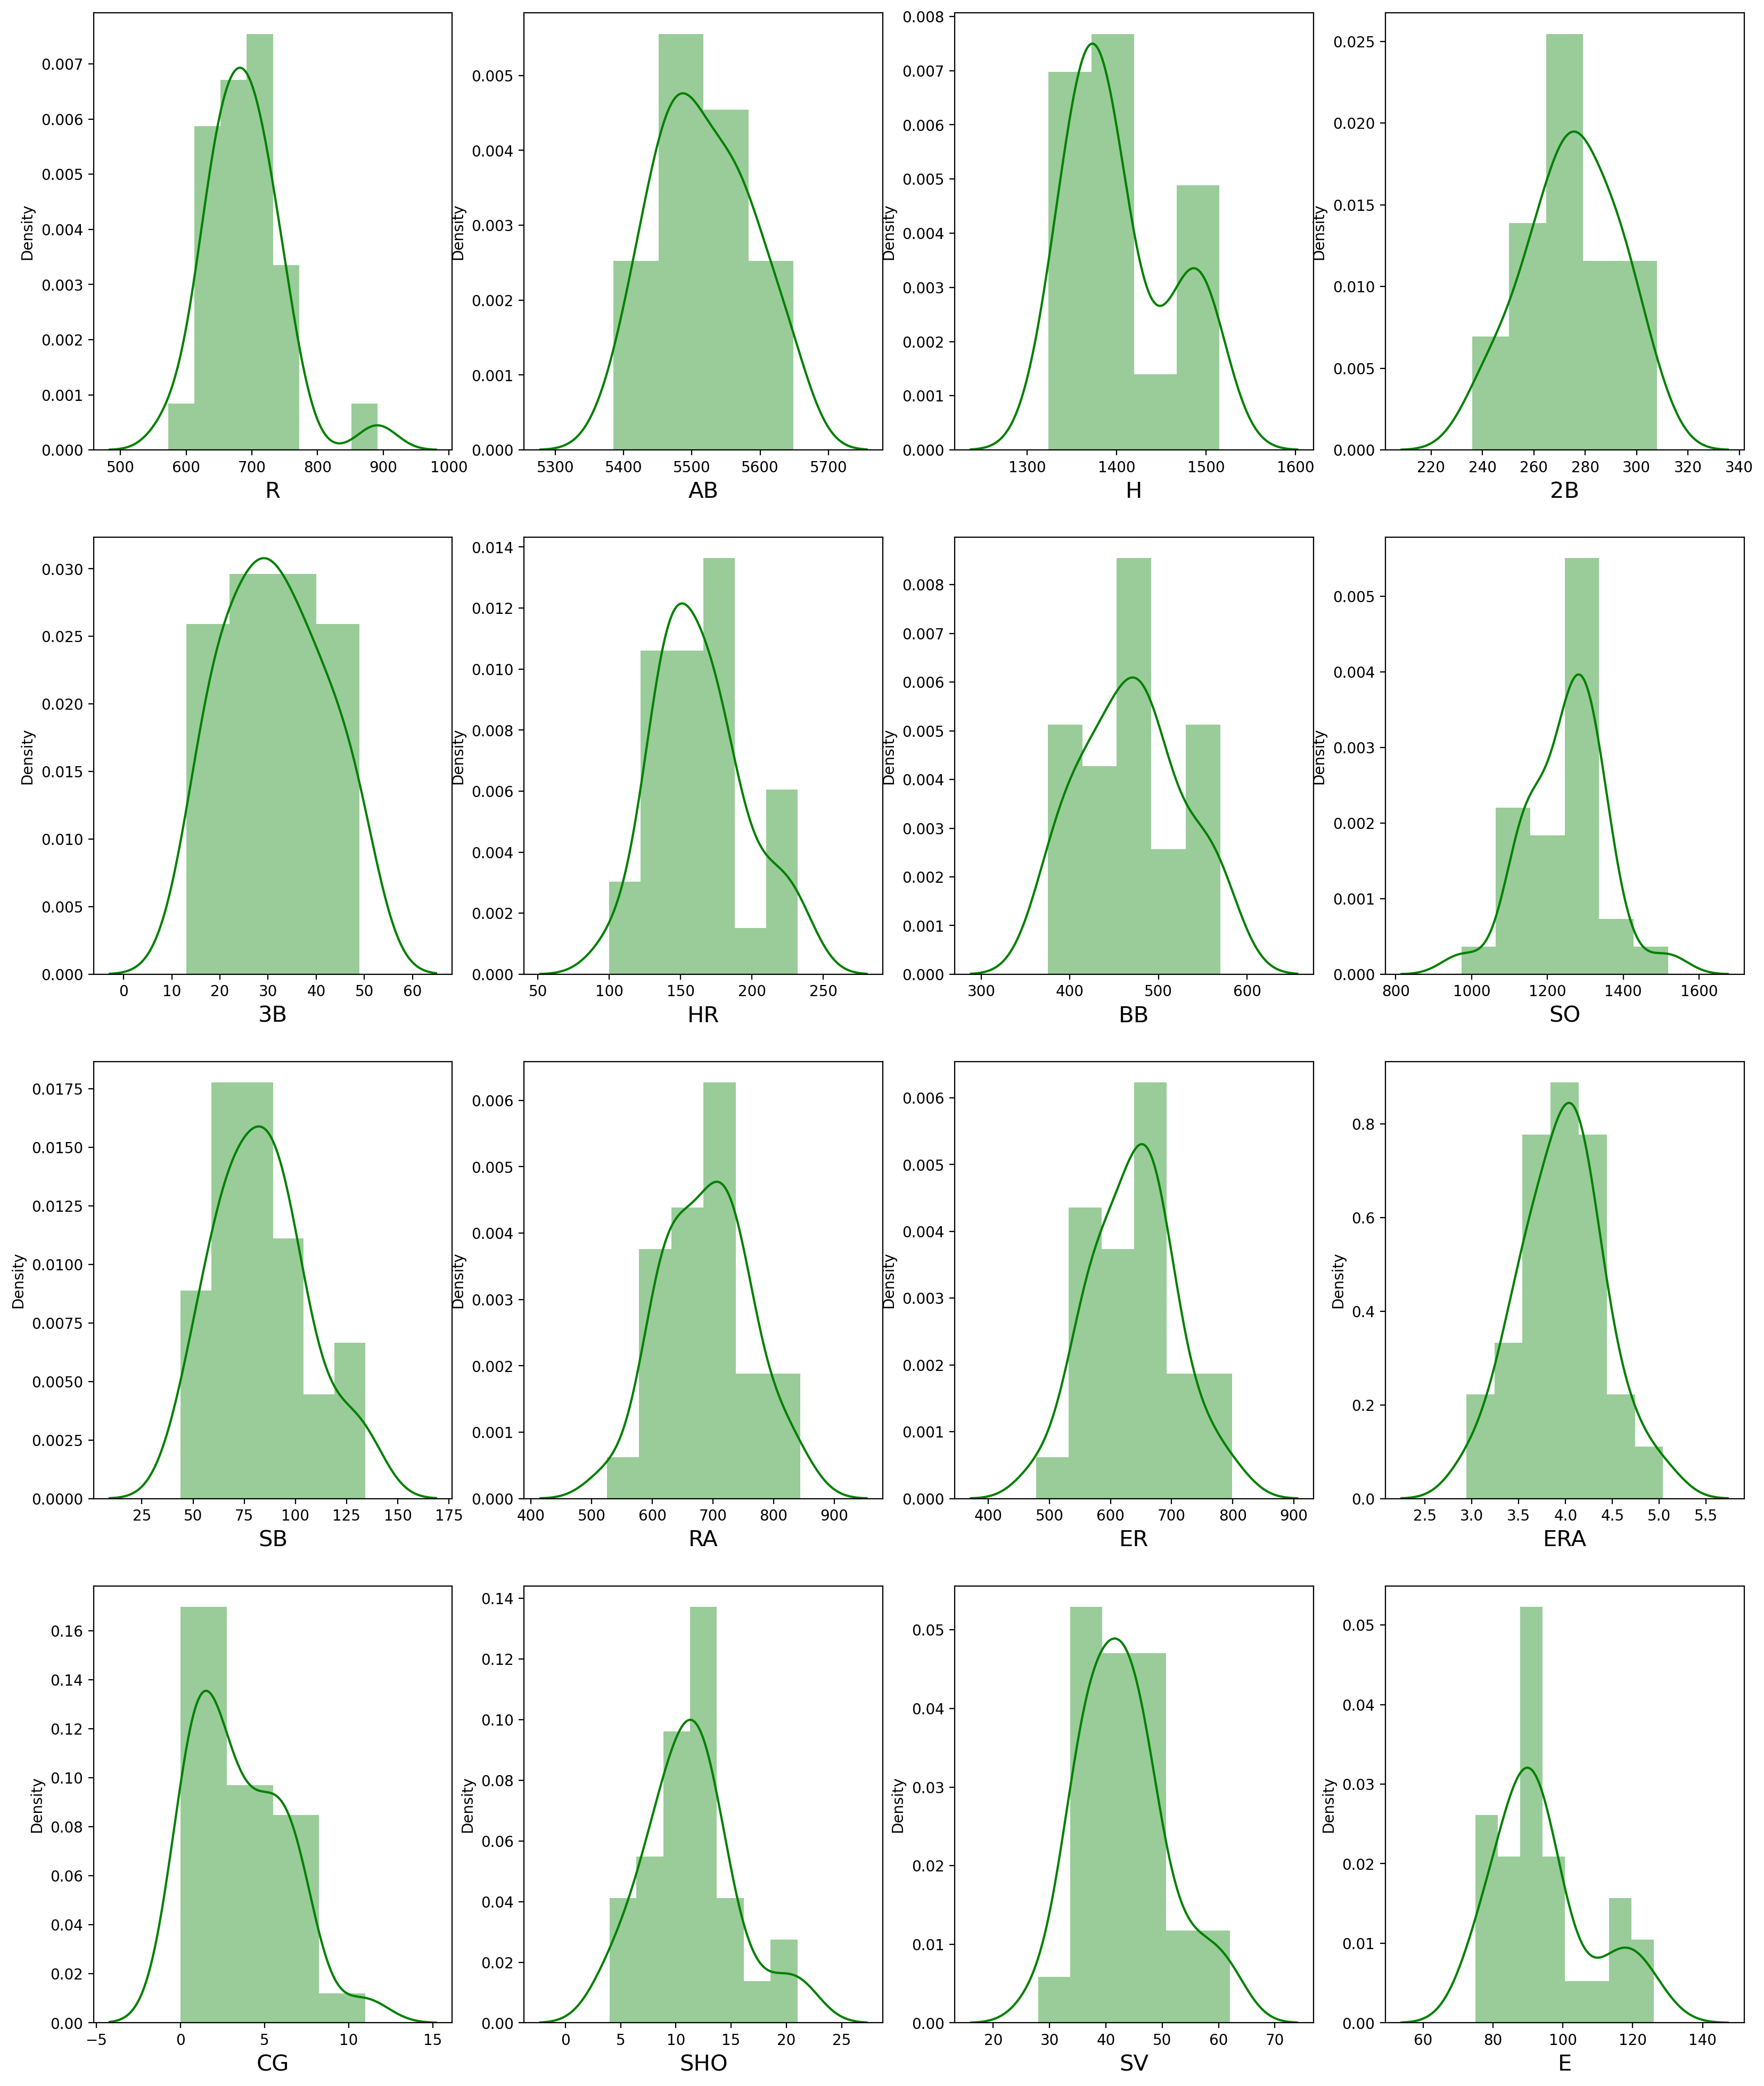

In [59]:
plt.figure(figsize=(20,25),dpi=200)
graph = 1
for column in df_data:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.distplot(df_data[column],color='g')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [60]:
#cheching skewness
df.skew()


W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# skweness exists in R ,CG,E but can be verifed again with graphical plot.

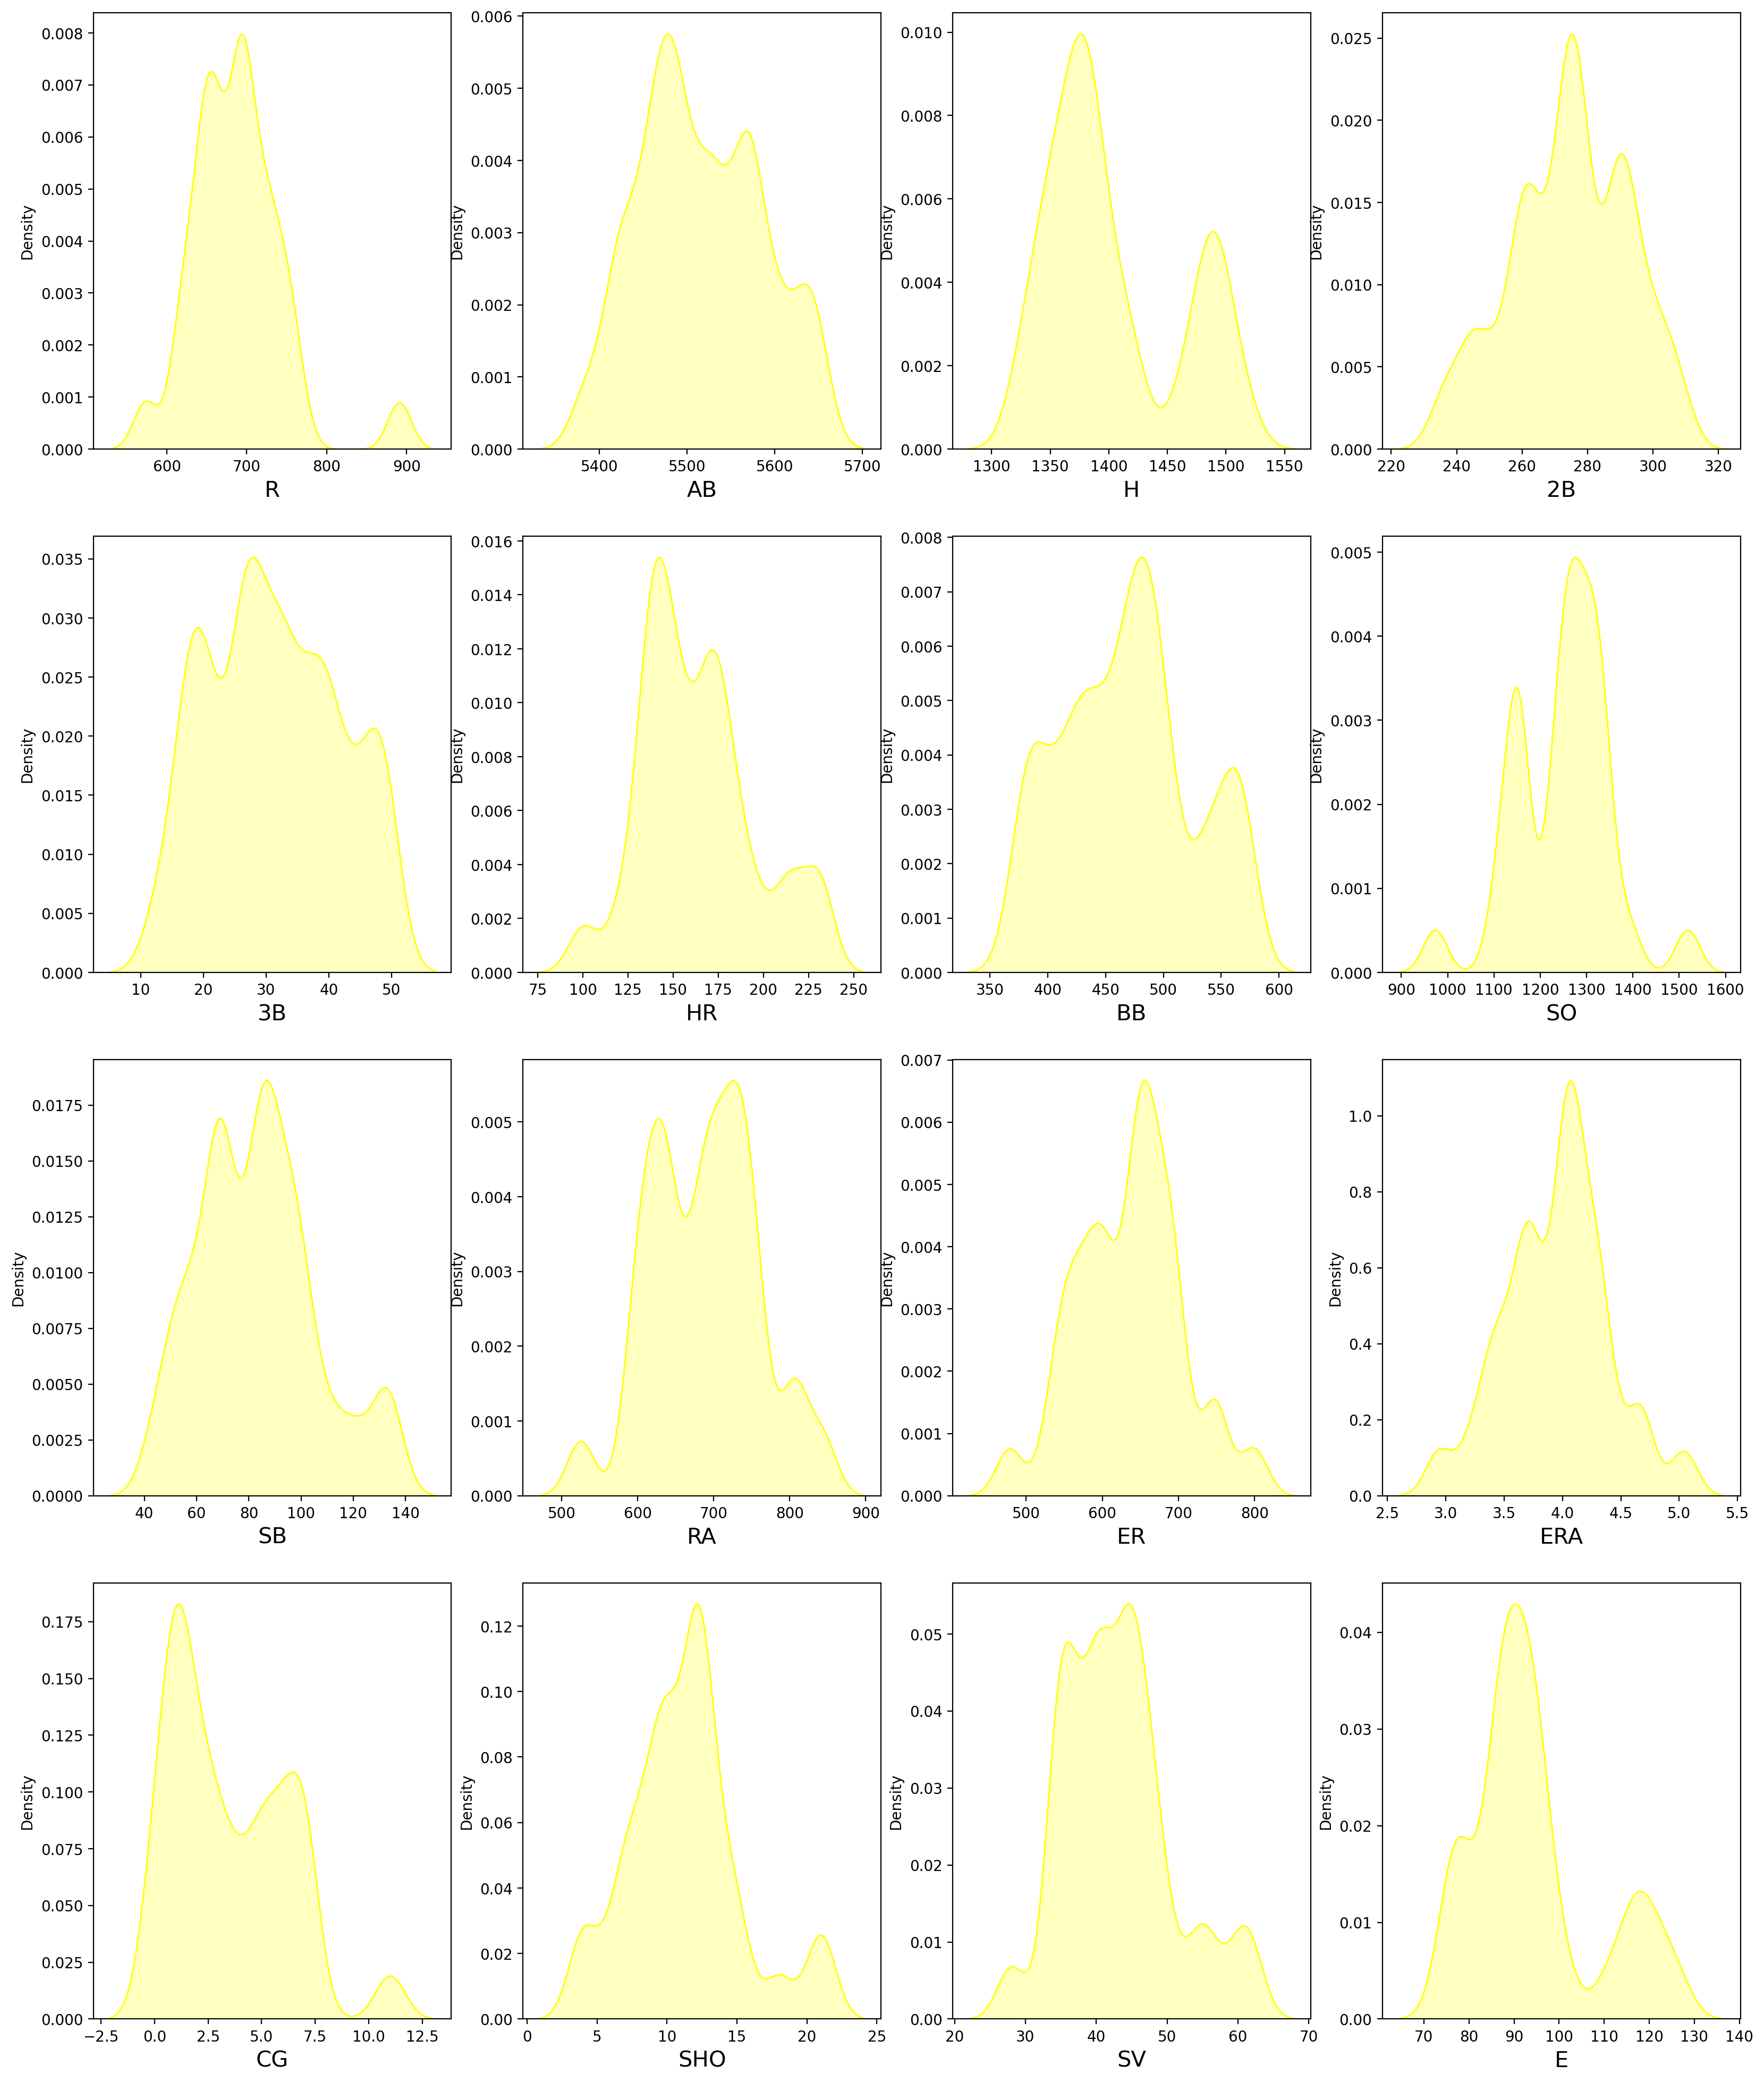

In [61]:
plt.figure(figsize=(20,25),dpi=200)
graph = 1
for column in df_data:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.kdeplot(data=df_data[column],bw_adjust=0.5,shade=True,color='yellow')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# distribution almost looks normal except few one like E,CG,CHO but more or less dataset follow the normal distribution.

# REMOVING OUTLIERS BY Z-SCORE METHOD

In [62]:
from scipy.stats import zscore

In [63]:
z = zscore(df)
z.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.197838,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,0.003243,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-0.483244,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,-0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197


In [64]:
df1 = df[(z < 3).all(axis = 1)]
df1.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [65]:
df1.shape

(29, 17)

In [66]:
df.shape

(30, 17)

In [67]:
#calculating data loss percentage
data_loss = (30 - 29)/30 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  3.3333333333333335


# so we observe that data loss is nearabout 3.3 percent which is very less and effective.

In [68]:
#now again checking the skewness after zscore
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# using  log method to correct skewness of E column

In [69]:
df['E'] = np.log(df['E'])

<AxesSubplot:xlabel='E', ylabel='Density'>

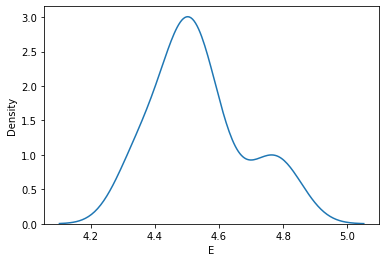

In [70]:
sns.kdeplot(data=df,x='E')

In [71]:
#dropping target columna
x = df1.drop(columns = 'W')
y = df1['W']

In [72]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [73]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [74]:
x.shape

(29, 16)

In [75]:
y.shape

(29,)

# scaling the data and check for multicollinearity

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
x_scaled = scaler.fit_transform(x)

In [78]:
#using vif to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


# as we observe above that the value of vif is is too large for ER AND ERA so we have to drop this.although value of vif is also large for AB but we consider this for future.

In [80]:
x = x.drop(columns = ['ER'])
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86


In [81]:
x = x.drop(columns = ['ERA'])
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


In [82]:
x.shape

(29, 14)

In [83]:
x_scaled = scaler.fit_transform(x)

In [84]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,6.755059,R
1,4.961772,AB
2,8.164151,H
3,3.391156,2B
4,3.171542,3B
5,6.350851,HR
6,3.148538,BB
7,2.135385,SO
8,1.881279,SB
9,5.088134,RA


# now the looks much better as all the multicoolinearity has been removed.lets confirm this by plotting boxplot graph.

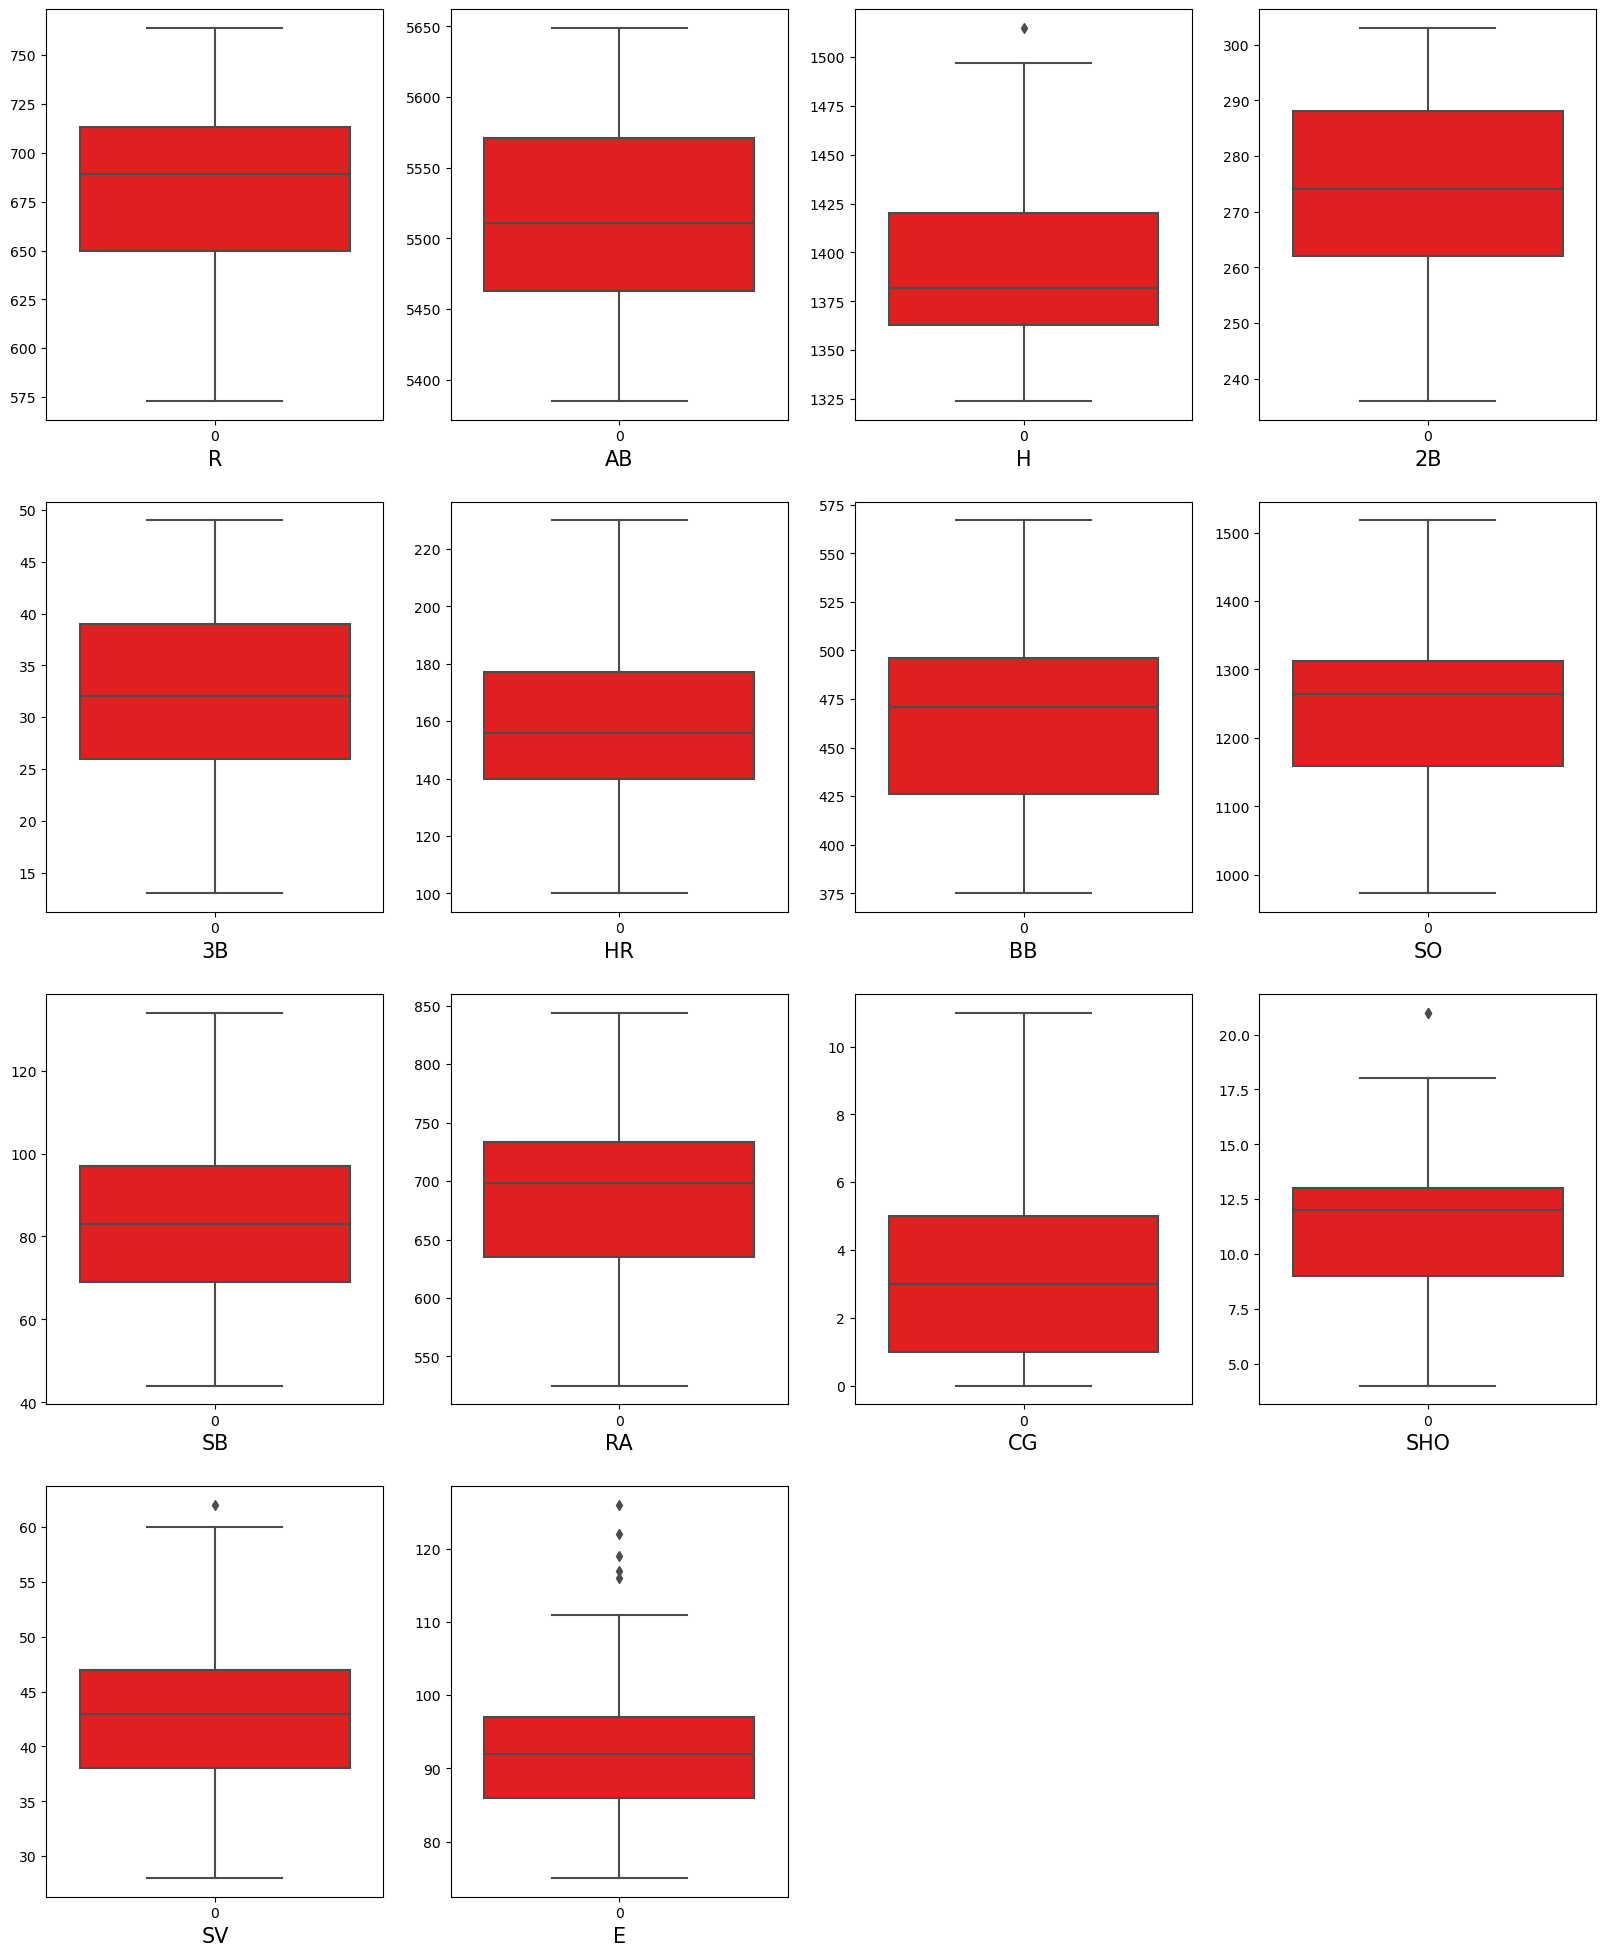

In [85]:
plt.figure(figsize=(20,25),dpi=100)
graph = 1
for column in x:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.boxplot(data=x[column],color='r')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# few columns has still ouliers which will be removed by iqr method

In [86]:
#Remove outliers for H
def remove_outliers_H(x):
    IQR = x['H'].quantile(0.75) - x['H'].quantile(0.25)
    
    higher_range = x['H'].quantile(0.75) + (1.5 * IQR)
    
    x.loc[x['H'] >= higher_range, 'H'] = higher_range

In [87]:
remove_outliers_H(x)

In [88]:
#Remove outliers for SHO
def remove_outliers_SHO(x):
    IQR1 = x['SHO'].quantile(0.75) - x['SHO'].quantile(0.25)
    
    higher_range1 = x['SHO'].quantile(0.75) + (1.5 * IQR1)
    
    x.loc[x['SHO'] >= higher_range1, 'SHO'] = higher_range1

In [89]:
remove_outliers_SHO(x)

In [90]:
#Remove outliers for SV
def remove_outliers_SV(x):
    IQR2 = x['SV'].quantile(0.75) - x['SV'].quantile(0.25)
    
    higher_range2 = x['SV'].quantile(0.75) + (1.5 * IQR2)
    
    x.loc[x['SV'] >= higher_range2, 'SV'] = higher_range2

In [91]:
remove_outliers_SV(x)

In [92]:
#Remove outliers for E
def remove_outliers_E(x):
    IQR3 = x['E'].quantile(0.75) - x['E'].quantile(0.25)
    
    higher_range3 = x['E'].quantile(0.75) + (1.5 * IQR3)
    
    x.loc[x['E'] >= higher_range3, 'E'] = higher_range3


In [93]:
remove_outliers_E(x)

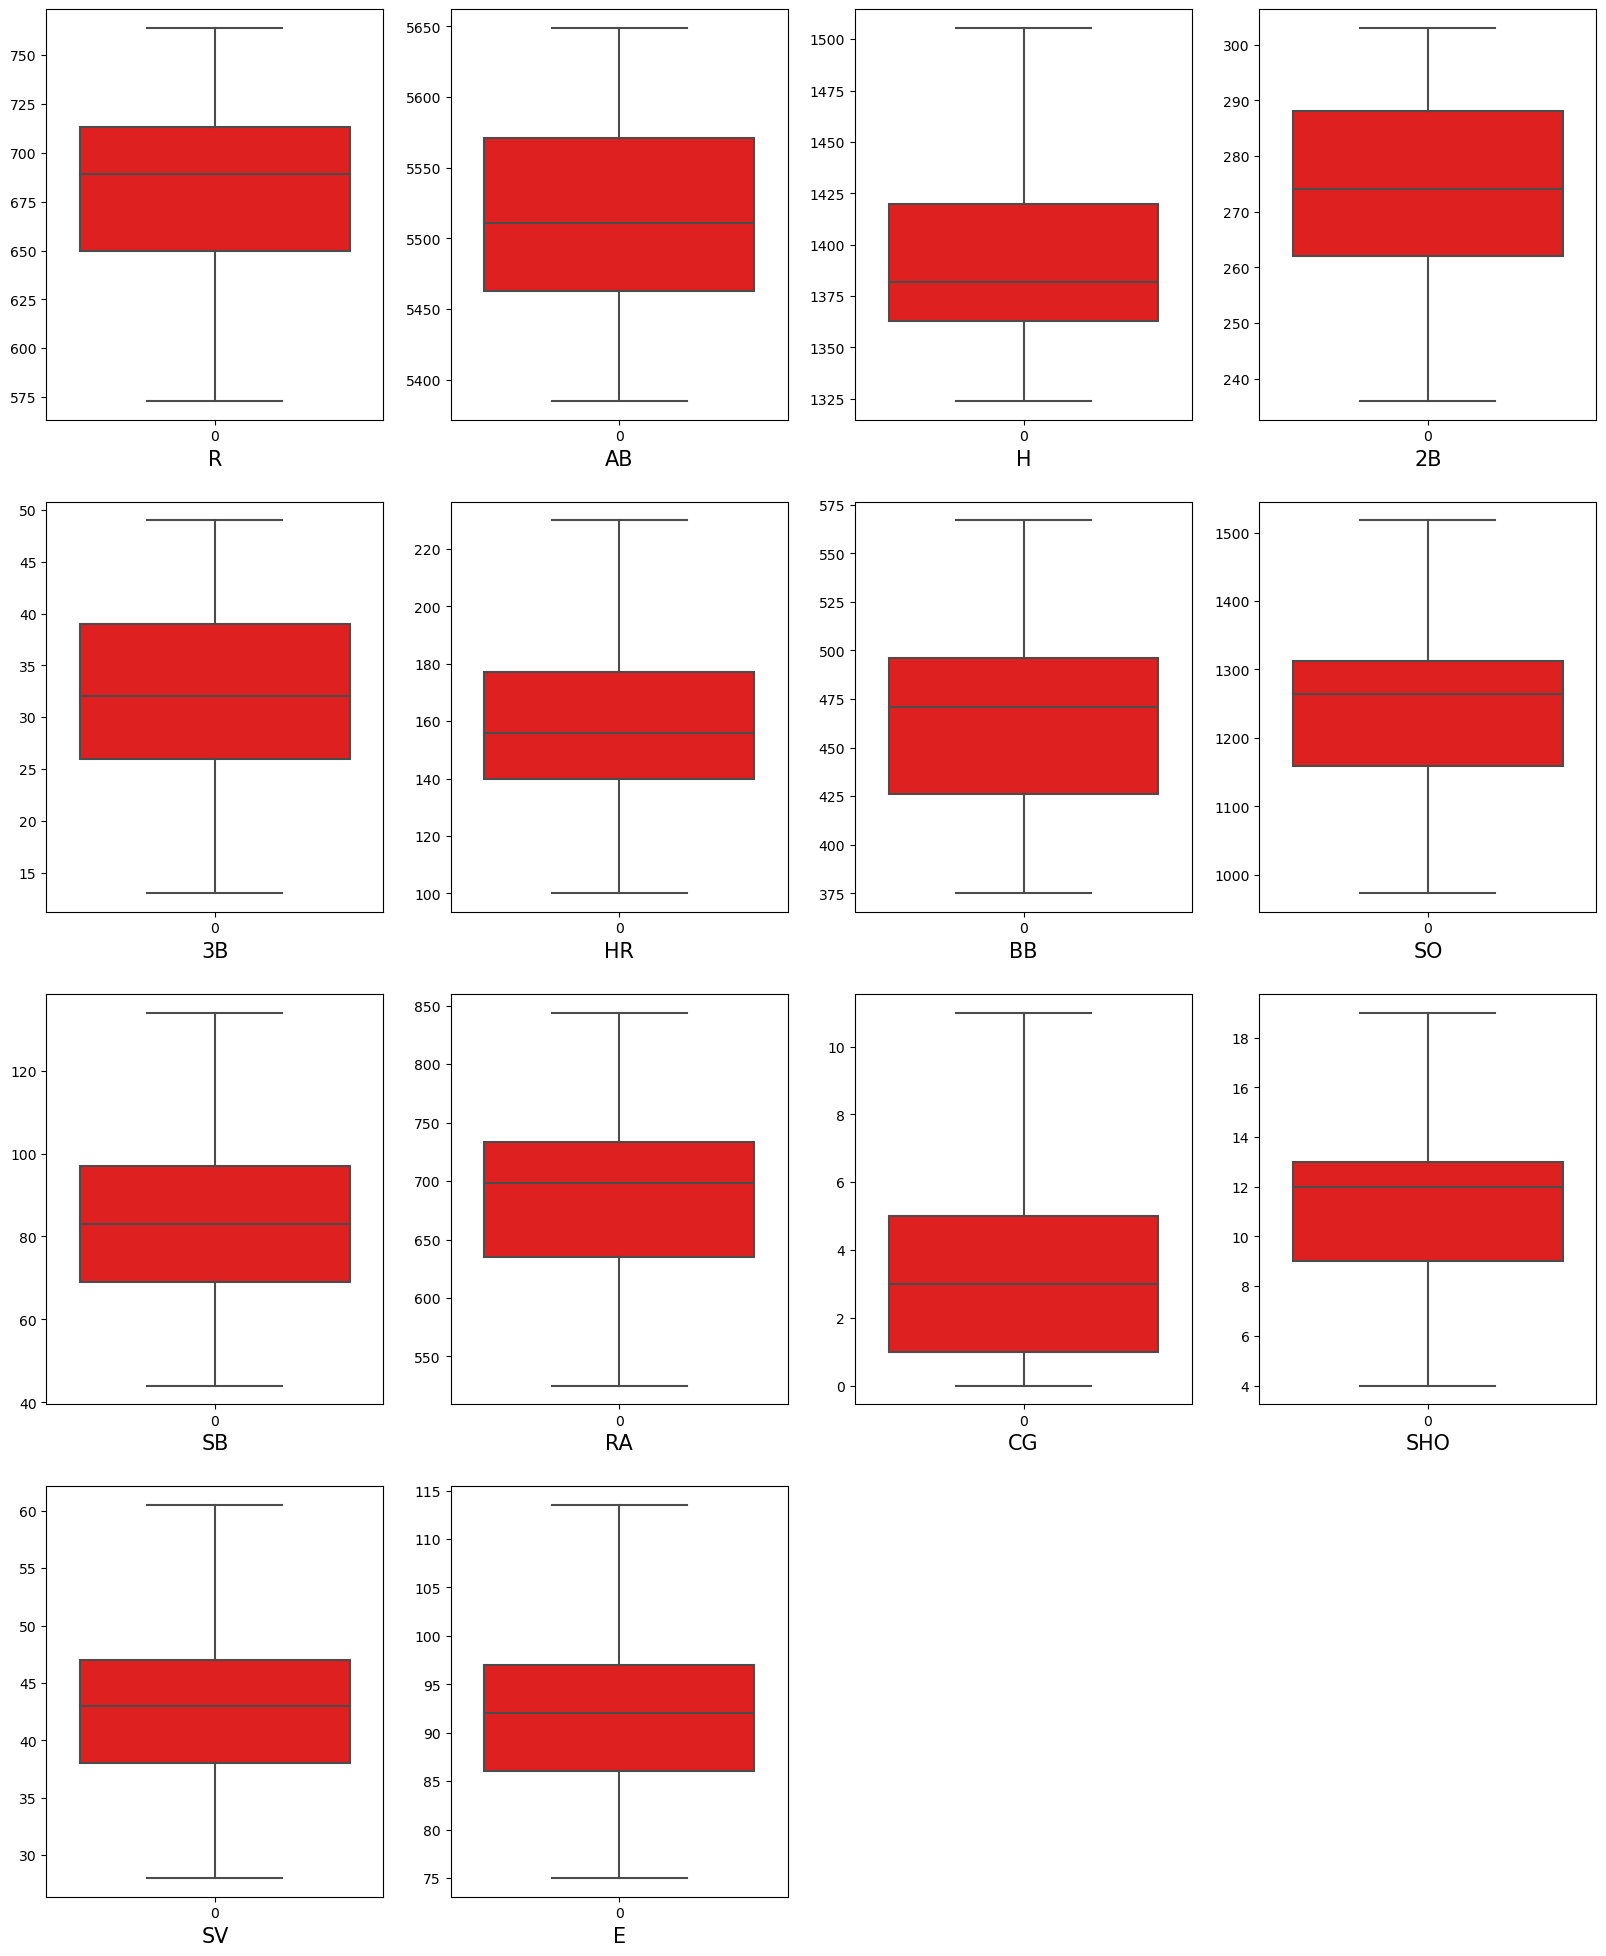

In [94]:
plt.figure(figsize=(20,25),dpi=100)
graph = 1
for column in x:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.boxplot(data=x[column],color='r')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [95]:
x.shape

(29, 14)

In [96]:
y.shape

(29,)

# almost all outliershas been removed and data looks better now for training

In [97]:
x.skew()

R     -0.215364
AB     0.169573
H      0.755080
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.183450
SV     0.558735
E      0.488224
dtype: float64

In [98]:
#using power transform to remove skeweness..
from sklearn.preprocessing import PowerTransformer

In [99]:
scale = PowerTransformer('yeo-johnson')

In [100]:
df = scale.fit_transform(x.values)
df

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -3.07098204e-01, -8.26026183e-01,
         1.56217727e+00, -3.69768380e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01, -3.07098204e-01,  2.42027812e-01,
         3.12974375e-01, -5.67676079e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01,  2.01131531e+00, -2.80796231e-01,
        -6.69761073e-01, -1.33884052e+00],
       [-1.30829774e+00,  0.00000000e+00,  0.00000000e+00,
        -8.37664770e-01, -4.32227907e-01, -8.60039342e-01,
        -1.16272085e+00, -2.30682707e-01, -6.

In [101]:
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.307098,-0.826026,1.562177,-0.369768
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,-0.307098,0.242028,0.312974,-0.567676
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,2.011315,-0.280796,-0.669761,-1.338841
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,1.264463,-0.550279,-0.826080,0.726298
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.264463,0.242028,-1.152937,-0.567676
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.121871,-2.013565,0.684236,0.087918
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,-1.732896,-0.280796,0.050159,-1.584776
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.870682,0.242028,1.951037,0.257556
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.121871,-0.280796,-0.370097,0.420224
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.770649,-0.550279,0.312974,1.544096


In [102]:
x_scaled = scaler.fit_transform(df)

In [103]:
#Import train test split
from sklearn.model_selection import train_test_split

# MODEL BUILDINGS USING VARIOUS METHODS

In [104]:
#Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#Import Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [105]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X' * 50,'\n')

At random state  173 The model performance very well
At random state:  173
Test R2 score is:  0.9
Train R2 score is:  0.9
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  198 The model performance very well
At random state:  198
Test R2 score is:  0.92
Train R2 score is:  0.92
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [106]:
# Select Random state = 198
x_train,x_test,y_train,y_test= train_test_split(x_scaled , y,random_state = 198,test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [107]:
LR_model = LinearRegression()
rd_model = Ridge()
ls_model = Lasso()
dt_model = DecisionTreeRegressor()
SV_model = SVR()
knr_model = KNeighborsRegressor()
rfr_model = RandomForestRegressor()
E_model = ElasticNet()
sgh_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
gb_model = GradientBoostingRegressor()

model=[LR_model,rd_model,ls_model,dt_model,SV_model,knr_model,rfr_model,E_model,sgh_model,Bag_model,ADA_model,gb_model ]

In [108]:
#Checking R2 score and MAR and  for all model
for z in model:
    z.fit(x_train,y_train)
    print('MAE of ',z ,'model', mean_absolute_error(y_test, z.predict(x_test)))
    print('MSE of',z,'model' , mean_squared_error(y_test, z.predict(x_test)))
    print('RMSE of',z,'model' , mean_squared_error(y_test, z.predict(x_test), squared = False))
    print('Test R2 Score of',z,'model', r2_score(y_test, z.predict(x_test) ) * 100)
    print("cross Validation score of ", z," is ",cross_val_score(z, df, y, cv = 10, scoring = 'neg_mean_squared_error').mean())
    print('#' * 80, '\n\n')

MAE of  LinearRegression() model 2.79618229651343
MSE of LinearRegression() model 10.889824597160432
RMSE of LinearRegression() model 3.2999734237051714
Test R2 Score of LinearRegression() model 92.32510404272169
cross Validation score of  LinearRegression()  is  -25.810752562414613
################################################################################ 


MAE of  Ridge() model 2.8874301429579012
MSE of Ridge() model 9.92022497607997
RMSE of Ridge() model 3.1496388643906417
Test R2 Score of Ridge() model 93.00845538099297
cross Validation score of  Ridge()  is  -22.82941164516138
################################################################################ 


MAE of  Lasso() model 2.2208710022466533
MSE of Lasso() model 6.669150717818995
RMSE of Lasso() model 2.5824698871078815
Test R2 Score of Lasso() model 95.29973716050345
cross Validation score of  Lasso()  is  -19.612850652160425
################################################################################ 


MAE of

# FROM THE ABOVE WE CONCLUDE THAT LASSO MODEL PROVIDES THE BEST RESULT.SO WE CAN HYPERTUNE THAT MODEL TO SEE ANY IMPROVEMENT IN RESULT.

# HYPERTUNING LASSO MODEL

In [109]:
from sklearn.model_selection import GridSearchCV

In [124]:
#hypertuning lasso model

params = {'alpha': [ 0.01, 1, 5, 10,20, 30, 35, 40, 45, 50, 55, 100],'normalize': ['deprecated'],
         'positive': [True, False]}

GCV= GridSearchCV(ls_model,params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   100],
                         'normalize': ['deprecated'],
                         'positive': [True, False]})

In [125]:
GCV.best_params_

{'alpha': 1, 'normalize': 'deprecated', 'positive': False}

In [126]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.9529973716050345

# After hypertuning model provides r2 score of more than 95% which is great!!!!

# lets hypertune ridge model which has got second highest r2 score.

# HYPERTUNING RIDGE MODEL 

In [130]:
#hypertuning ridge model

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(rd_model,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [131]:
ridge_regressor.best_params_

{'alpha': 5}

In [132]:
rd_pred = ridge_regressor.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.9529973716050345

# saving our best model

# i am going to save ridge model as after hypertuning it shows improvement as compared to lasso model but r2 score of both ismore than 95percent.

In [134]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'best_model.pickle'
pickle.dump(rd_model, open('ridge_model', 'wb'))

In [135]:
#Prediction using the saved model
loaded_model = pickle.load(open('ridge_model','rb'))

In [137]:
#Loading model
conclusion = loaded_model.predict(x_test)
conclusion.mean()

75.9913947689583

In [138]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
result = pd.DataFrame({'Actual Win': y_test, 'Predicted Win': conclusion})
result.head()

,Actual Win,Predicted Win
29,68,67.316958
28,74,70.865266
15,100,97.829498
3,76,72.113234
24,63,60.186937


Text(0.5, 1.0, 'Original vs predicted  graph')

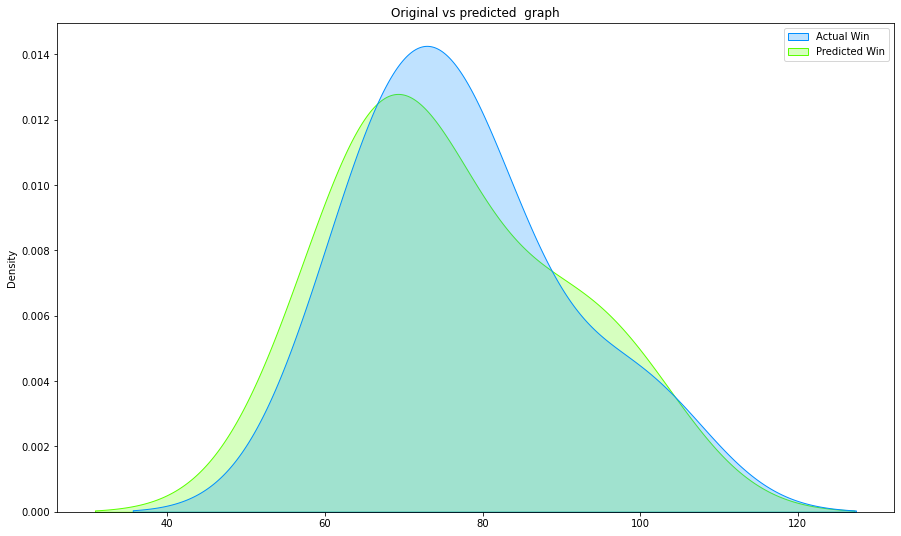

In [139]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=result, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

# conclusion...perfect relationship among actual win and predicted win